In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import copy
import time

import sys
sys.path.append('../../')

import models

from main.seir.fitting import single_fitting_cycle
from main.seir.forecast import get_forecast, forecast_all_trials, create_all_trials_csv, create_decile_csv_new
from utils.generic.create_report import save_dict_and_create_report
from utils.generic.config import read_config, make_date_key_str
from utils.generic.enums import Columns
from utils.fitting.loss import Loss_Calculator
from utils.generic.logging import log_wandb, log_mlflow
from viz import plot_forecast, plot_top_k_trials, plot_ptiles

import yaml
import wandb

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/wandb/util.py:35: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3, and in 3.9 it will stop working
  from collections import namedtuple, Mapping, Sequence


In [3]:
predictions_dict = {}

In [4]:
config_filename = 'uncer.yaml'
config = read_config(config_filename)

wandb_config = read_config(config_filename, preprocess=False)
wandb_config = make_date_key_str(wandb_config)

In [5]:
timestamp = datetime.datetime.now()
output_folder = '../../misc/reports/{}'.format(timestamp.strftime("%Y_%m%d_%H%M%S"))

## Perform M1 and M2 fits

In [6]:
# import pickle as pkl
# with open('../../misc/predictions/exp_set_free.pickle', 'rb') as handle:
#     predictions_dict = pkl.load(handle)

# figs, axs = plt.subplots(2,4,figsize = [28,14])
# from viz.fit import plot_histogram,plot_comp_histogram
# true_val  = {"lockdown_R0": 0.8,
#     "T_inc": 5.1,
#     "T_inf": 3.6,
#     "T_recov": 21.5,
#     "T_recov_fatal": 25.5 ,
#     "P_fatal": 0.08,
#     "E_hosp_ratio": 0.34,
#     "I_hosp_ratio": 0.94}
# arr = list(true_val.keys())
# plot_histogram(predictions_dict['m1'],arr,true_val,figs,axs)

In [7]:
from unidip import UniDip

In [8]:
# from main.seir.forecast import _order_trials_by_loss
# params_array, losses_array = _order_trials_by_loss(predictions_dict['m1'])
# params_dict = {param: [param_dict[param] for param_dict in params_array]
#                 for param in arr}
# df = pd.DataFrame.from_dict(params_dict)


In [9]:
# print(list(df.columns))
# CM = df.corr()
# plt.figure(figsize=(15,15))
# ax.set_xticklabels([''] + labels)
# plt.matshow(CM,)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=10)

In [10]:
# CM.abs().mean().sort_values()

In [11]:
# for i in arr:
#     R_0 = df[i].to_numpy()
#     R_0 = np.msort(R_0)
#     interavals = UniDip(R_0,alpha=0.0000001, ntrials=1000).run()
#     print(i,interavals)

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  0%|          | 0/5000 [00:00<?, ?it/s]

Performing m1 fit ..
loading from ../../misc/cache/dataframes_ts_20012021_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 181                 | 182                 | 183                 | 184                 | 185                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-24 00:00:00 | 2020-10-25 00:00:00 | 2020-10-26 00:00:00 | 2020-10-27 00:00:00 | 2020-10-28 00:00:00 |
| state       | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         |
| district    | Mumbai              | Mumbai              | Mumbai              | Mumbai              | Mumbai              |
| total       | 249759.14           | 250955.0            | 252085.0            | 252886.0            | 254240.0   

  0%|          | 7/2000 [00:00<00:29, 67.13it/s]

The acceptance ratio is -------->  0.1466
The explored steps are -------->  146
The optimized steps are -------->  587
Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.0197259857656817,
    'I_hosp_ratio': 1.4655733885122137,
    'P_fatal': 1.2771783005747466,
    'T_inc': 1.159740750314557,
    'T_inf': 1.0576238362002288,
    'T_recov': 1.6462611472146471,
    'T_recov_fatal': 2.388488388924805,
    'gamma': 1.0158252368208205,
    'lockdown_R0': 1.0079517611886084}


100%|██████████| 2000/2000 [00:20<00:00, 98.30it/s] 


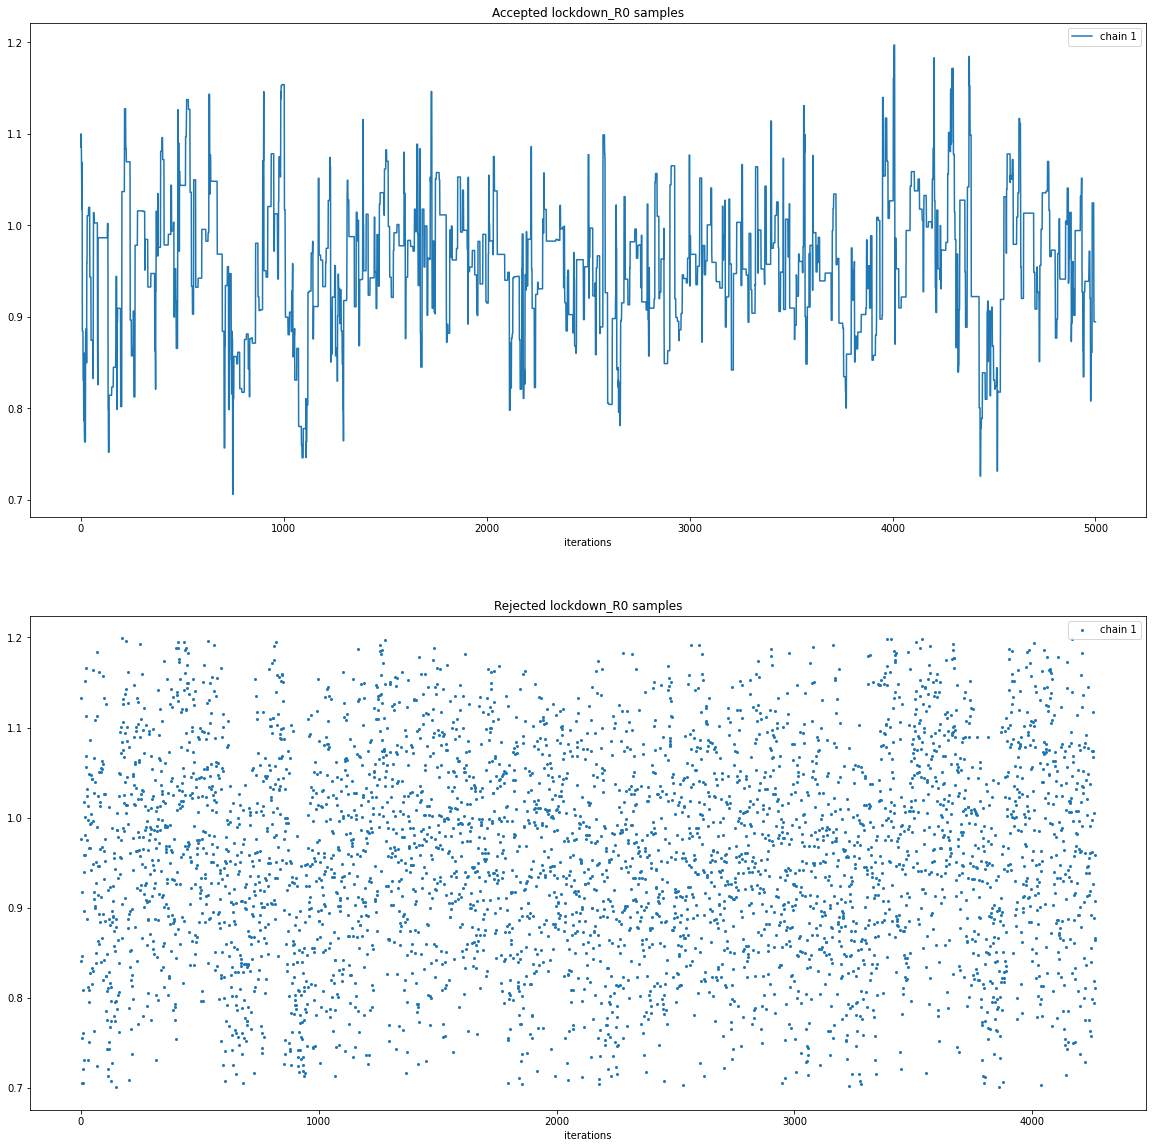

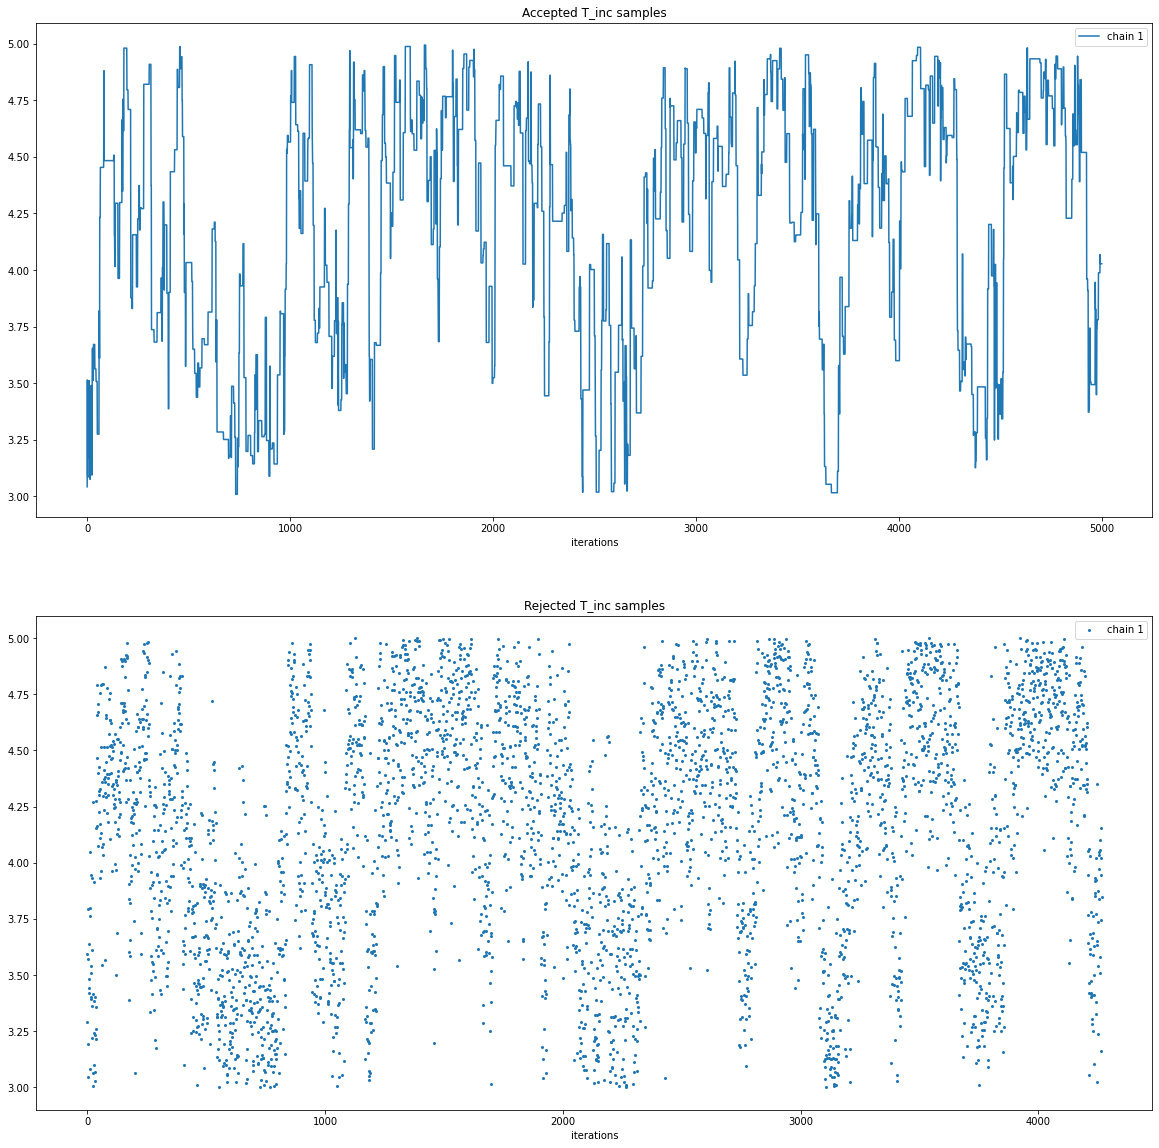

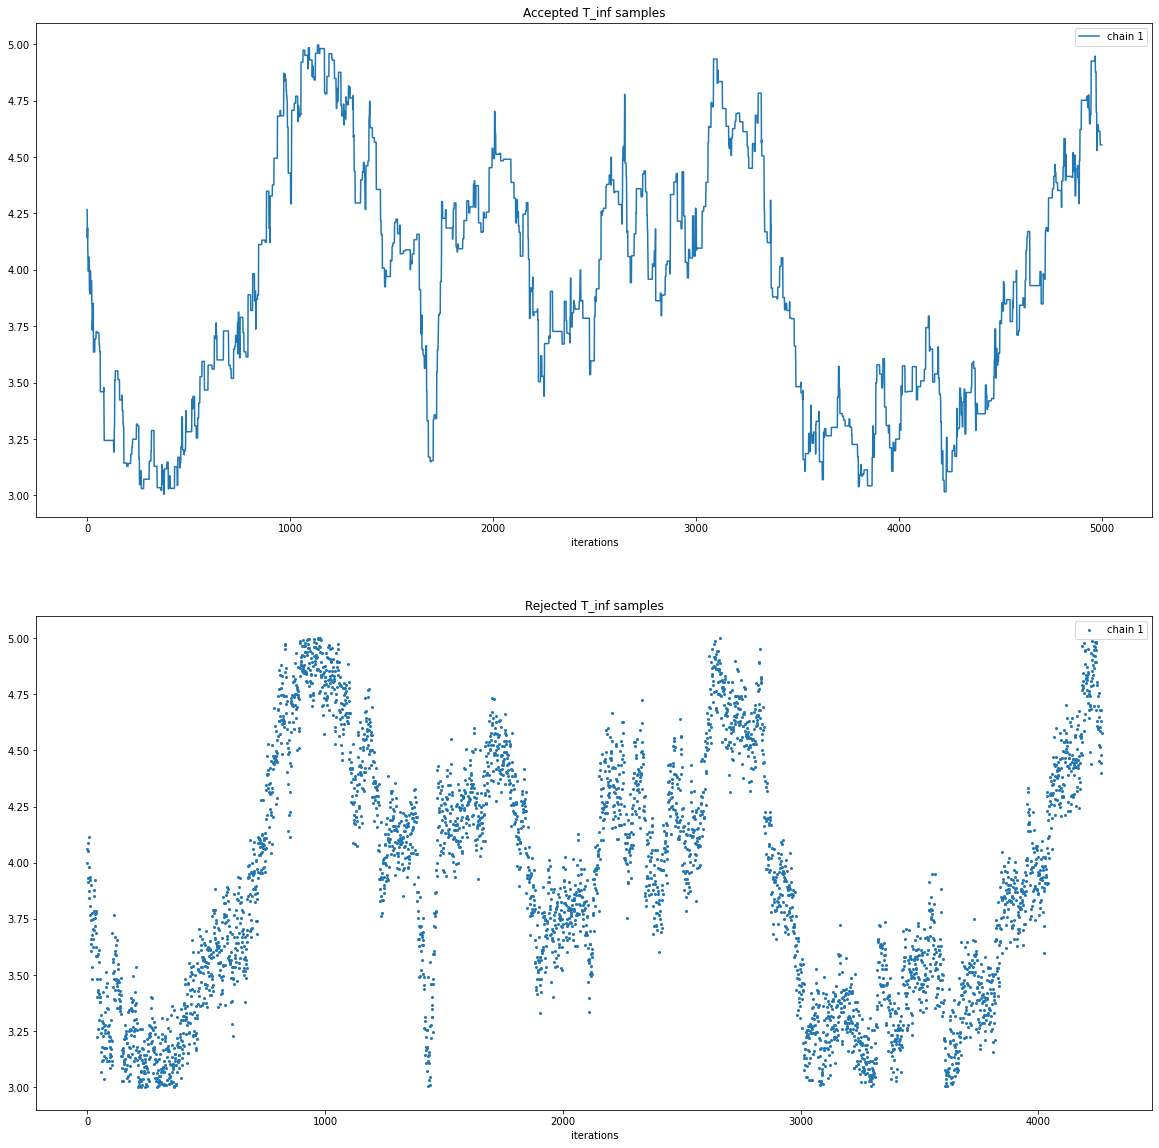

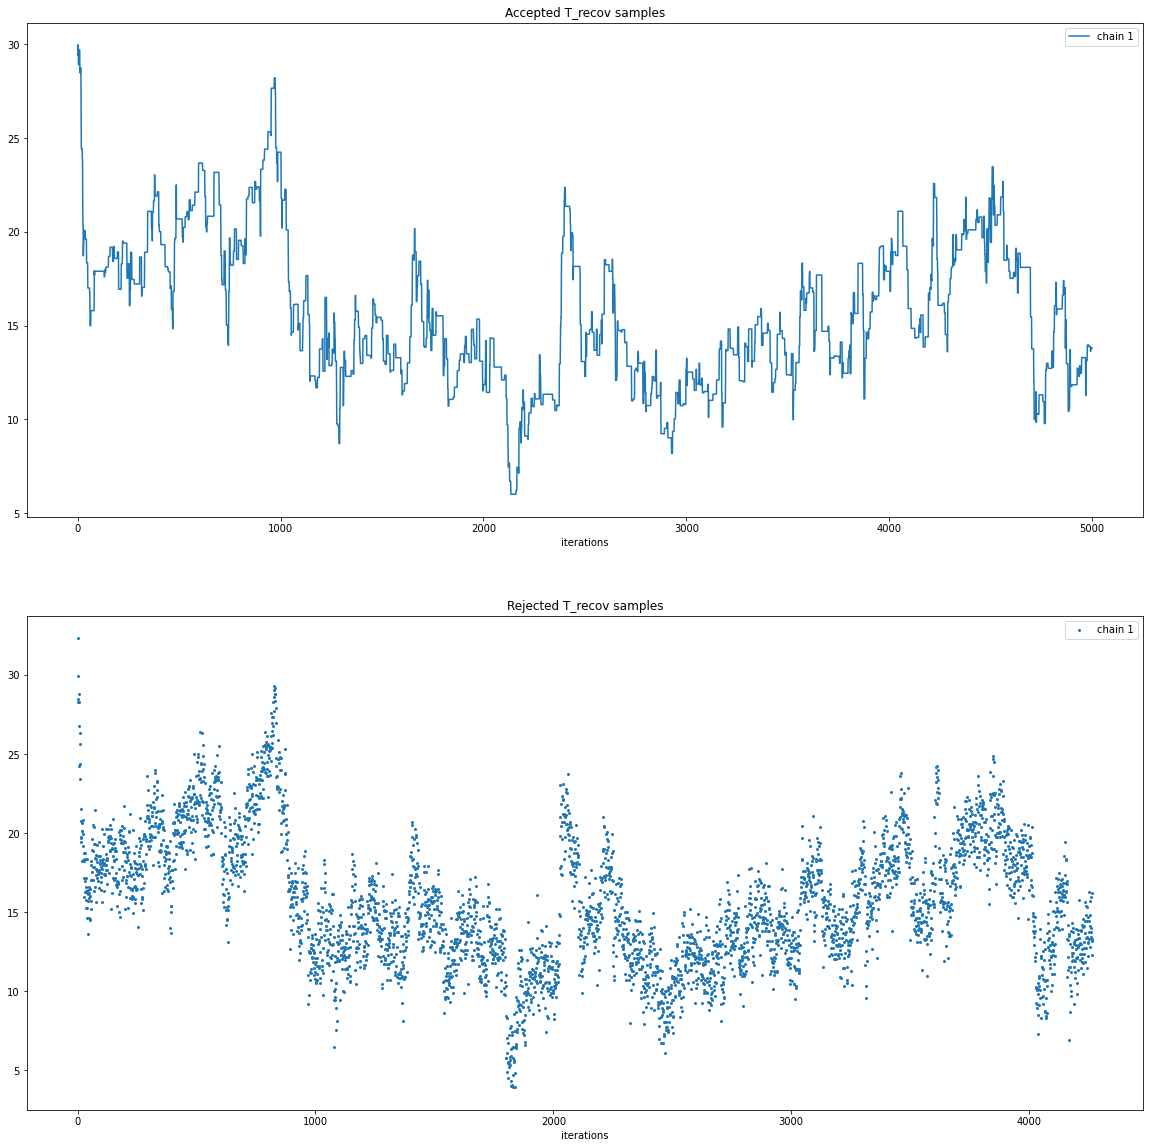

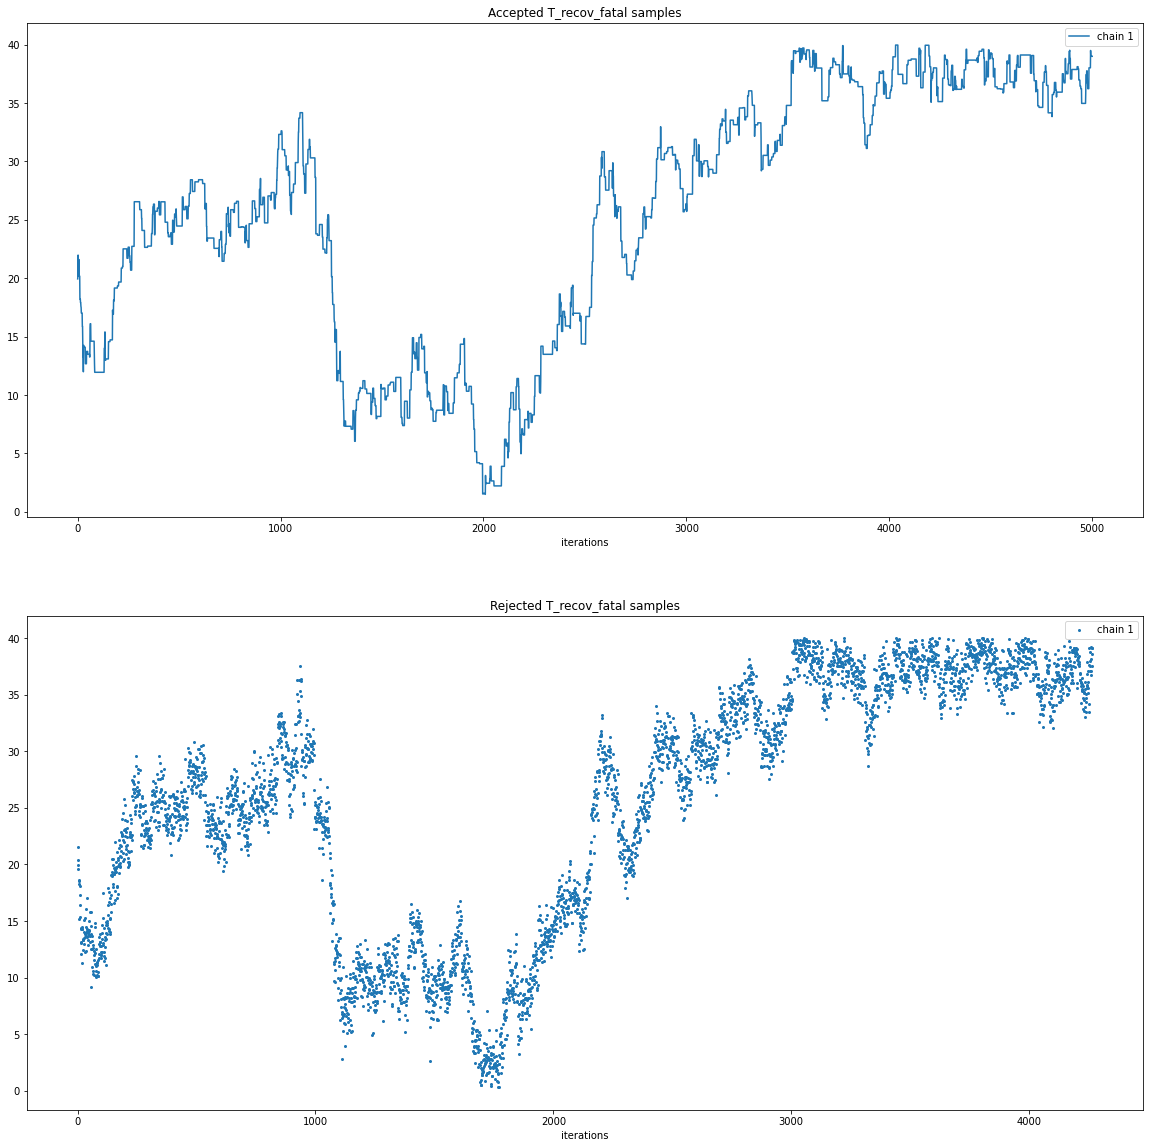

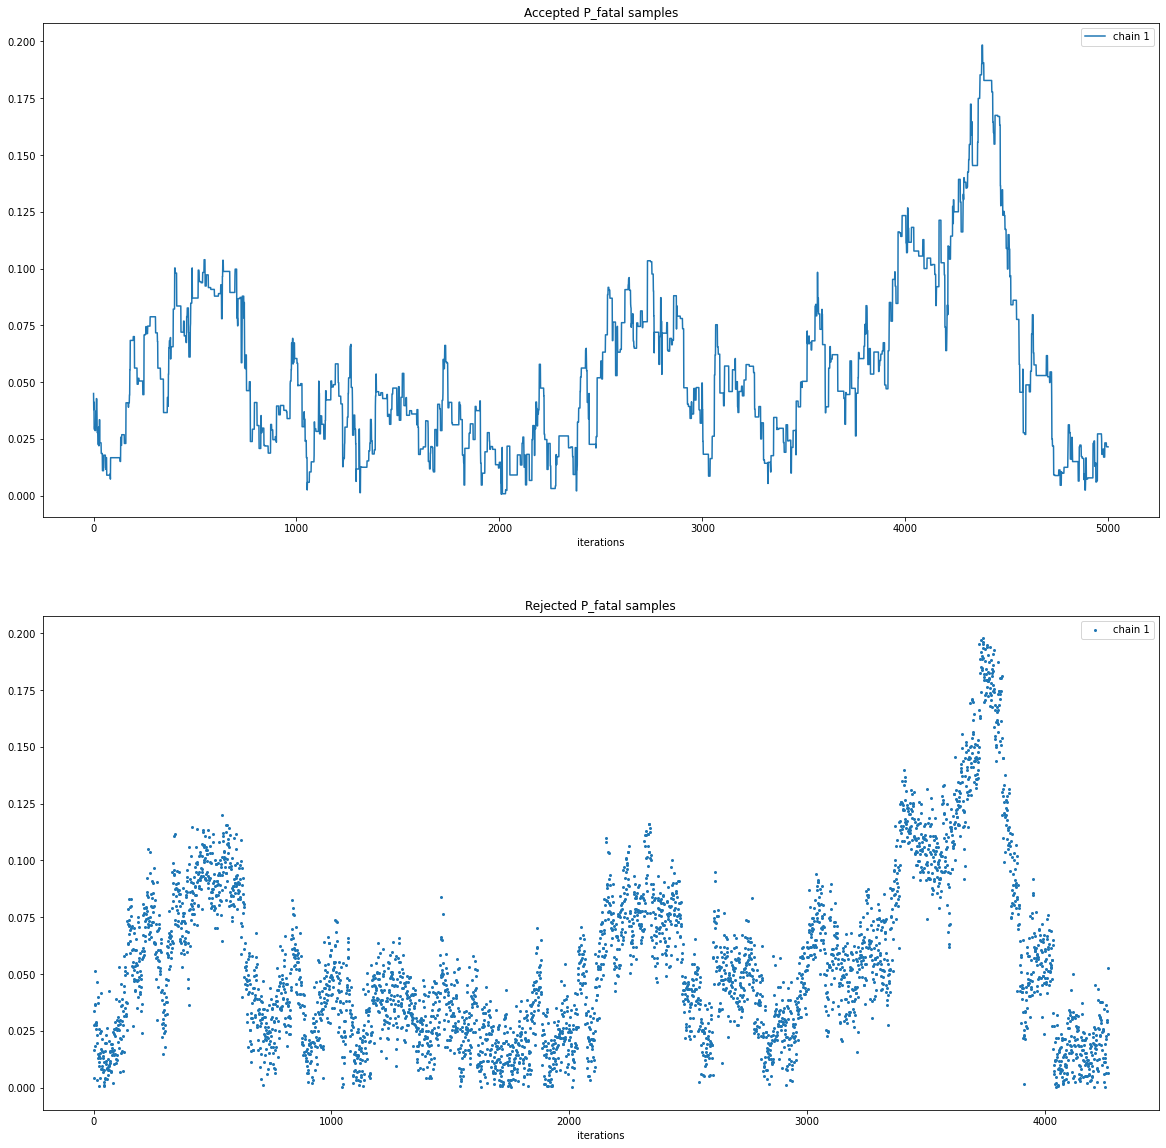

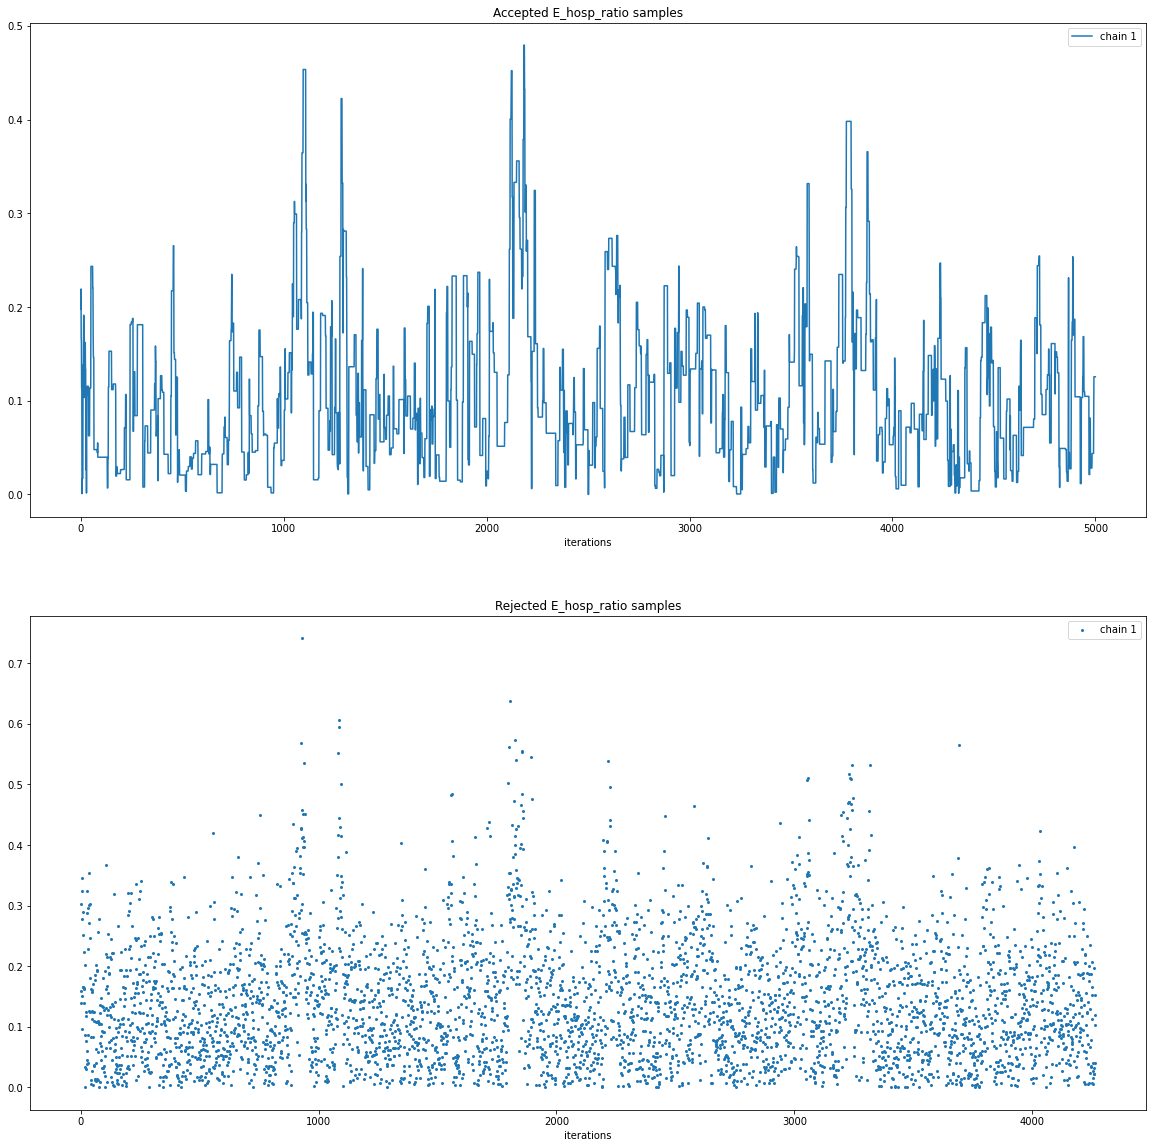

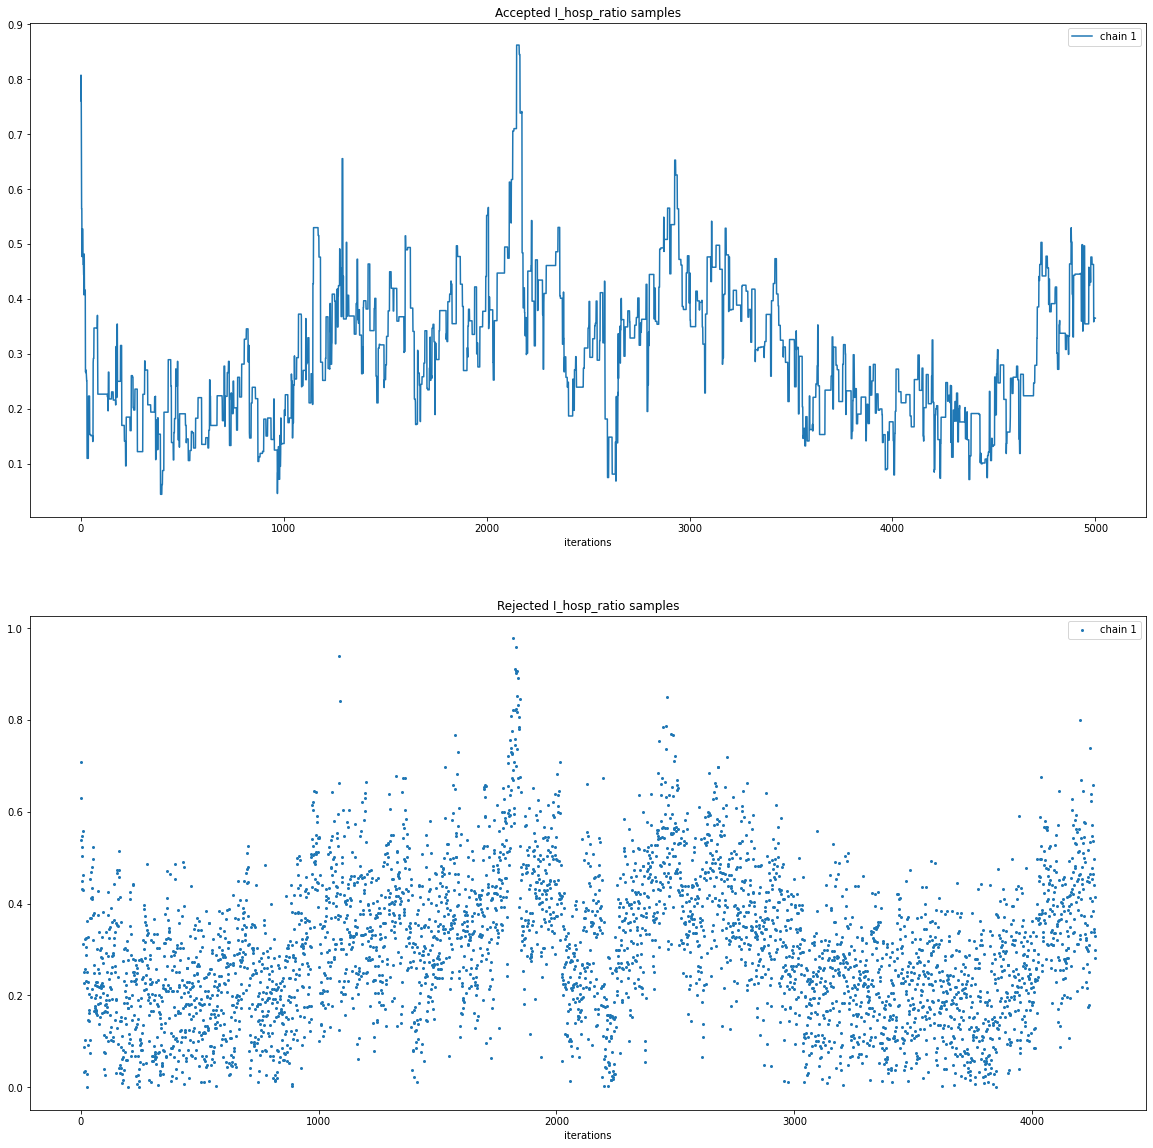

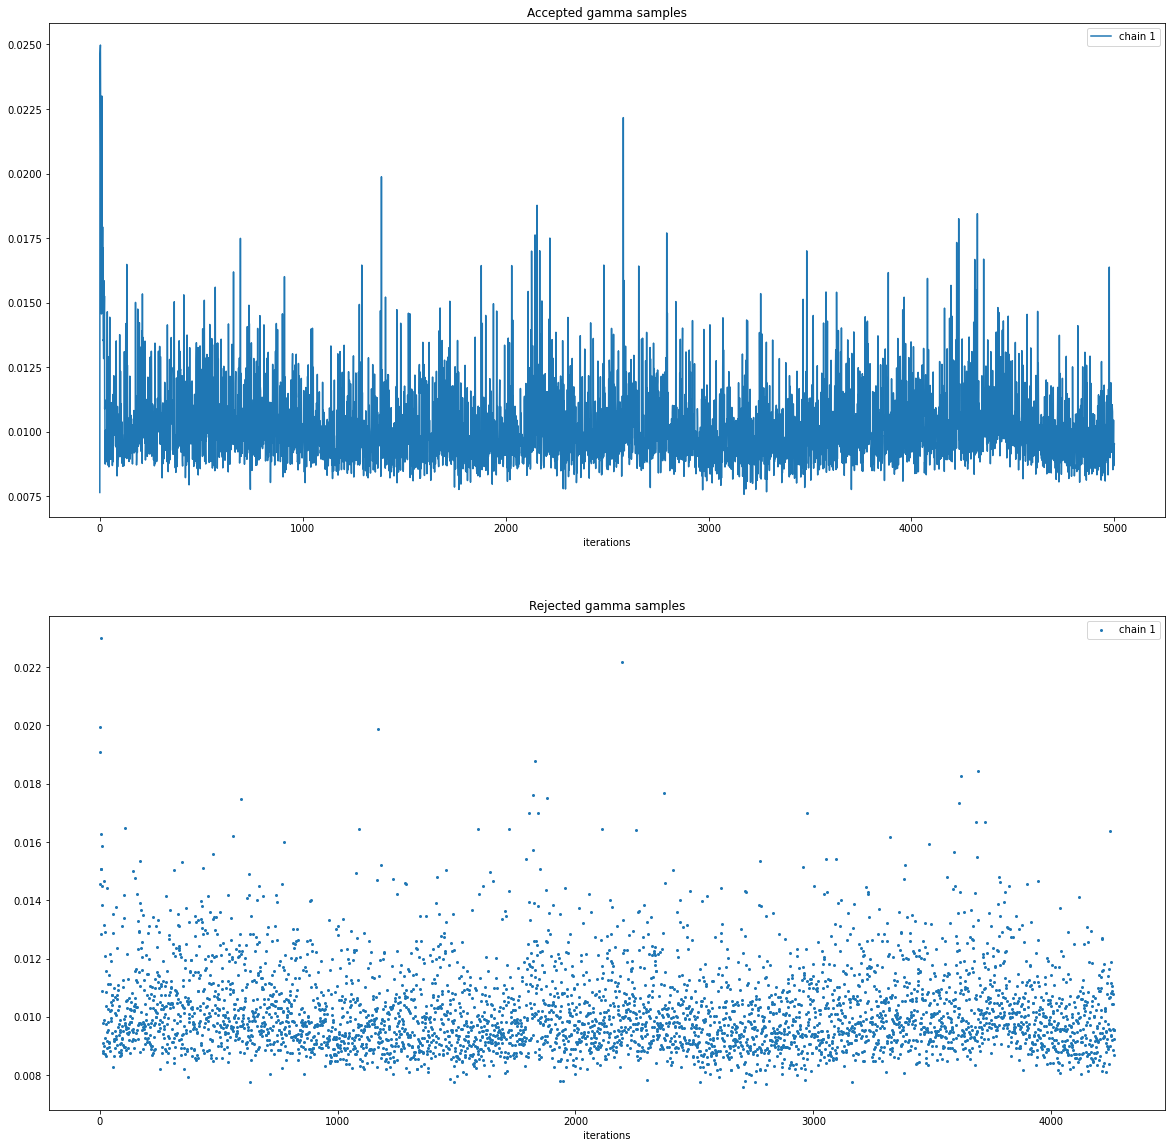

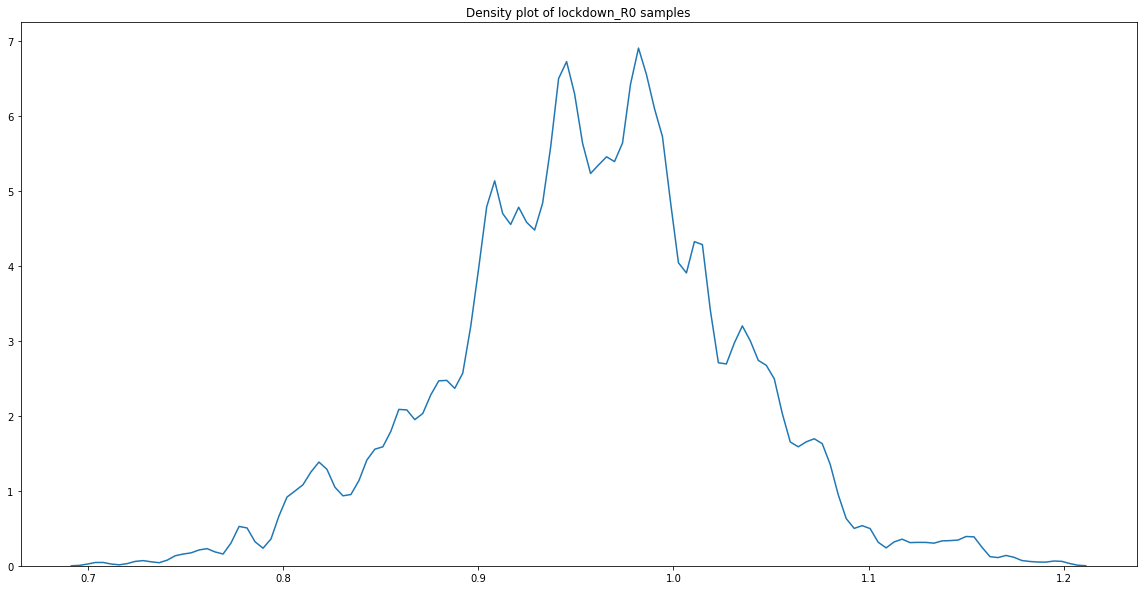

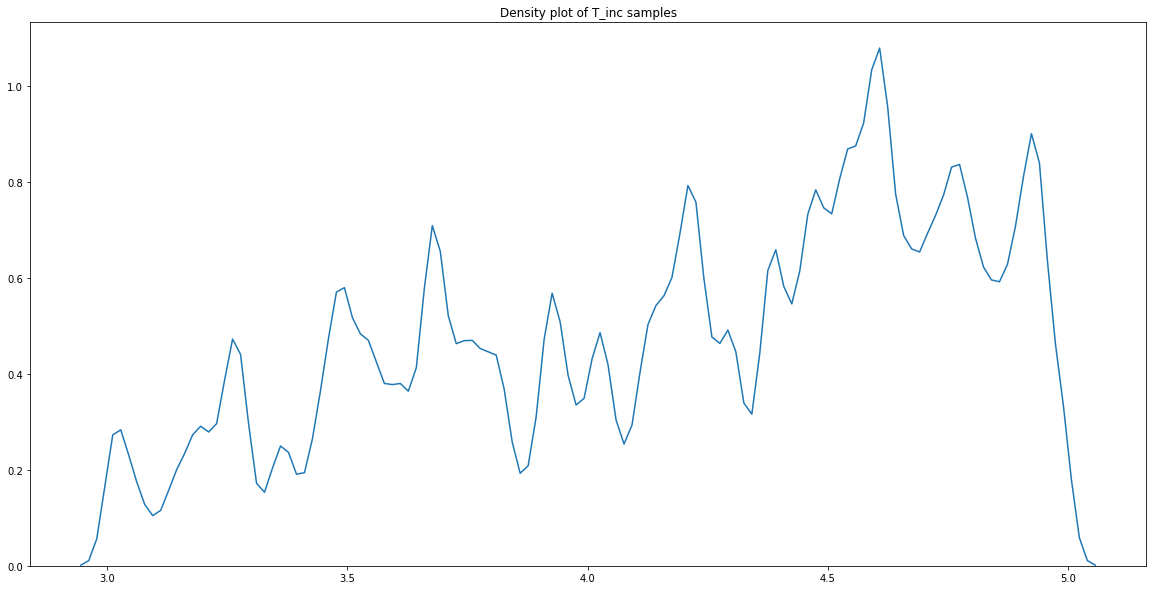

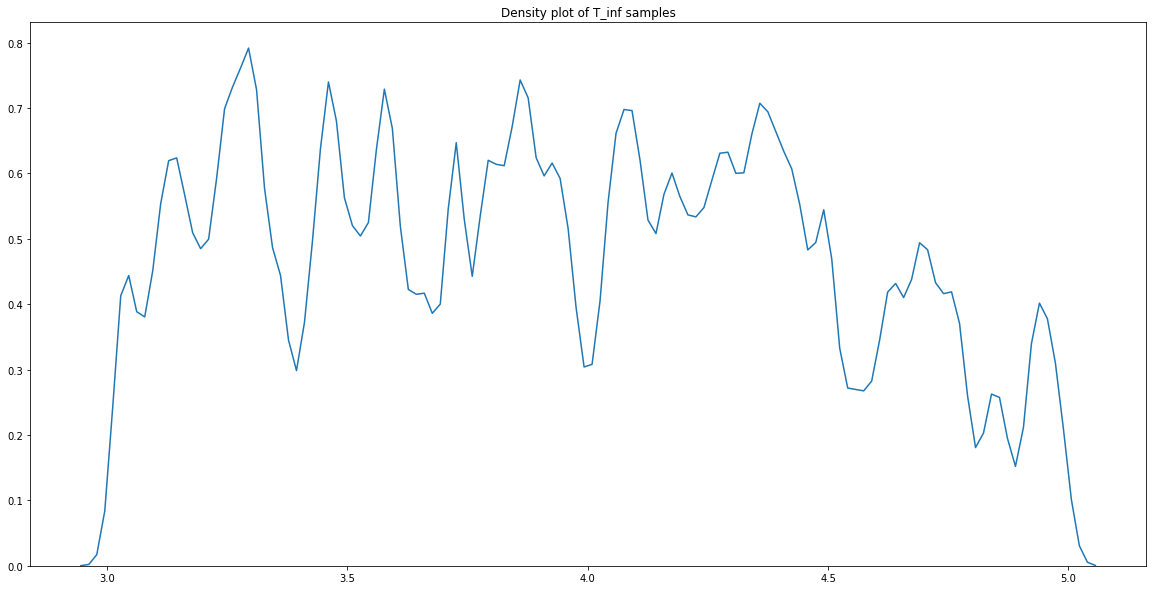

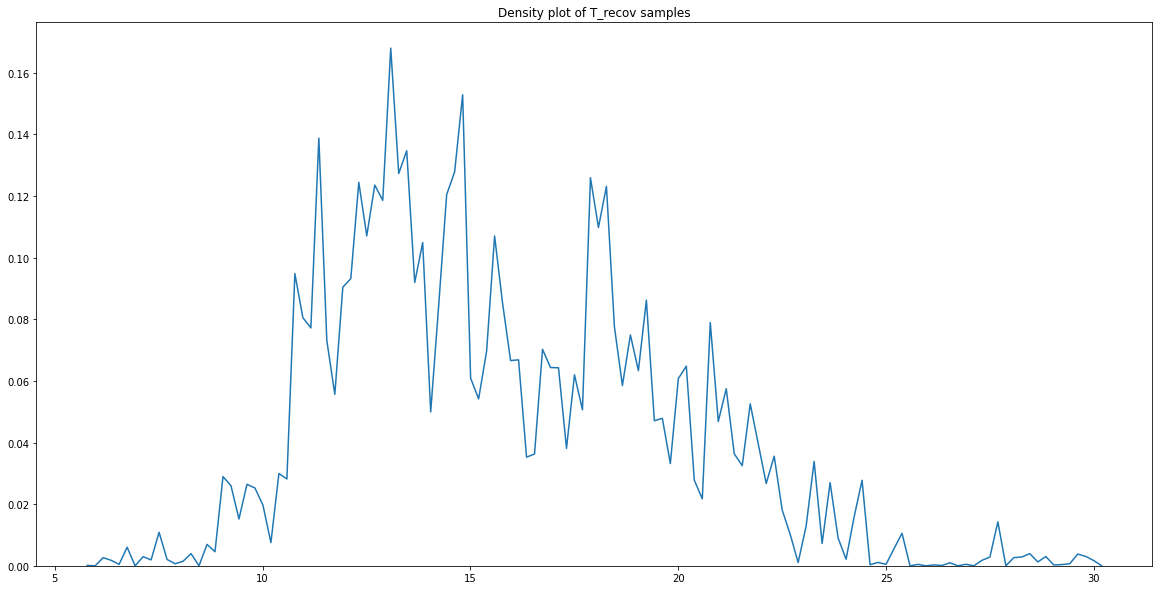

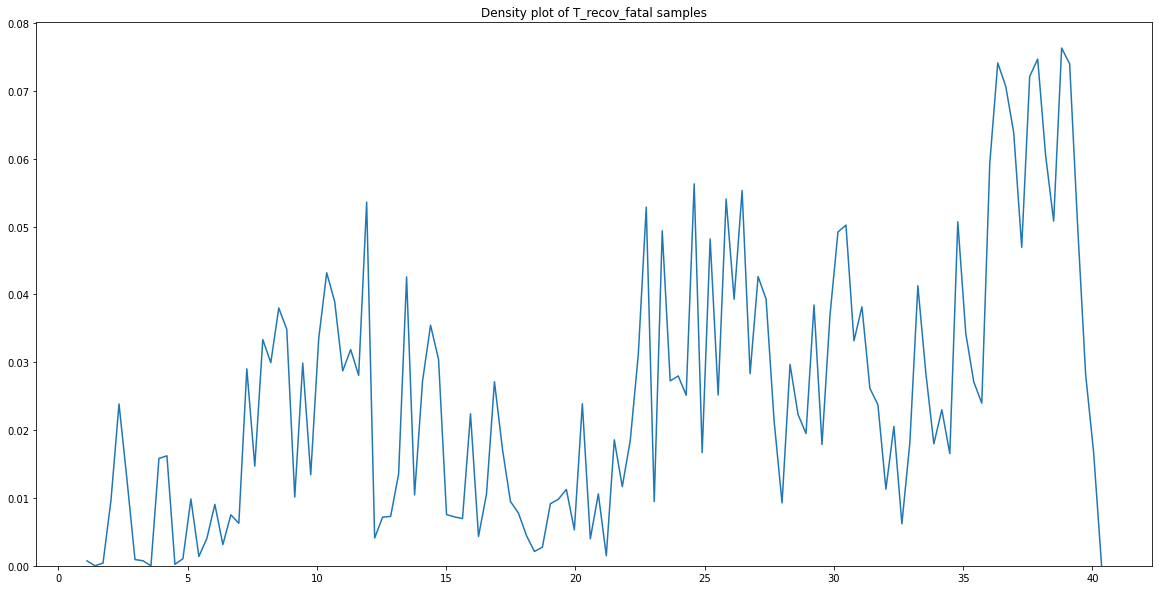

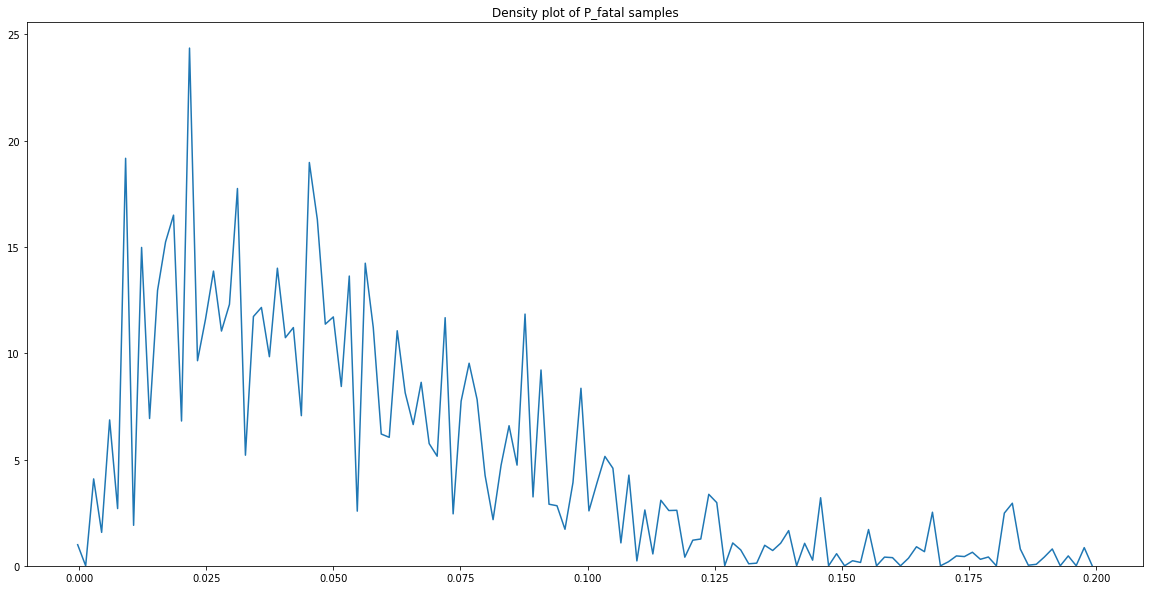

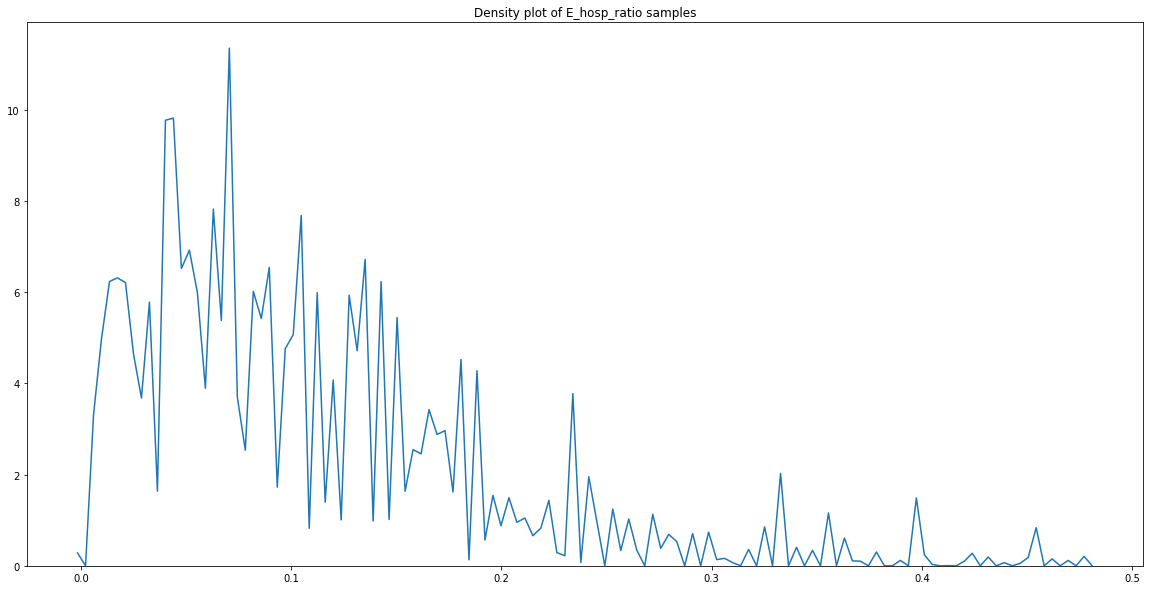

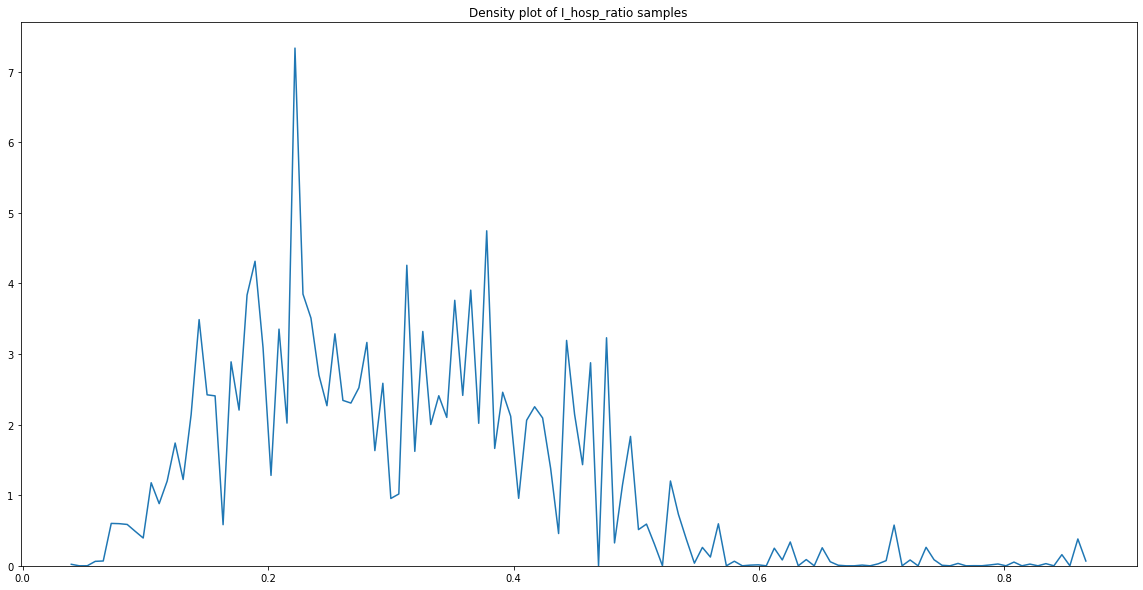

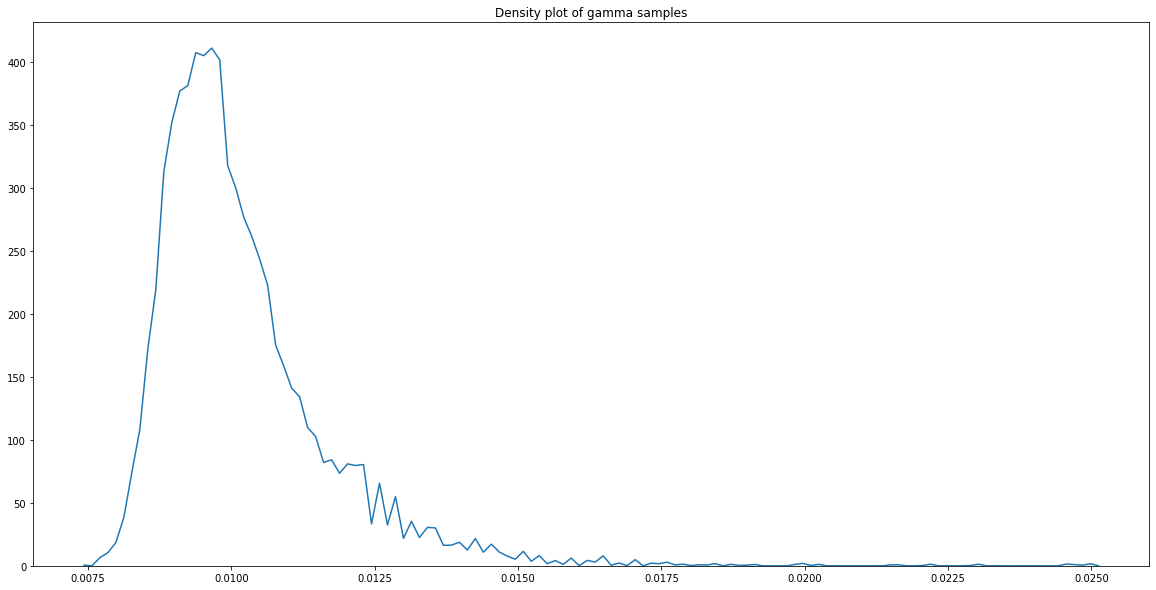

100%|██████████| 2000/2000 [00:20<00:00, 95.81it/s] 


best parameters
 OrderedDict([('lockdown_R0', 0.9431860044725617), ('T_inc', 4.601775225734361), ('T_inf', 4.070611123868887), ('T_recov', 11.514836723919545), ('T_recov_fatal', 7.374932004346077), ('P_fatal', 0.018105908193588746), ('E_hosp_ratio', 0.08358161090793016), ('I_hosp_ratio', 0.489169691964328), ('gamma', 0.009037791733632165)])
CPU times: user 2min 8s, sys: 2 s, total: 2min 10s
Wall time: 2min 10s


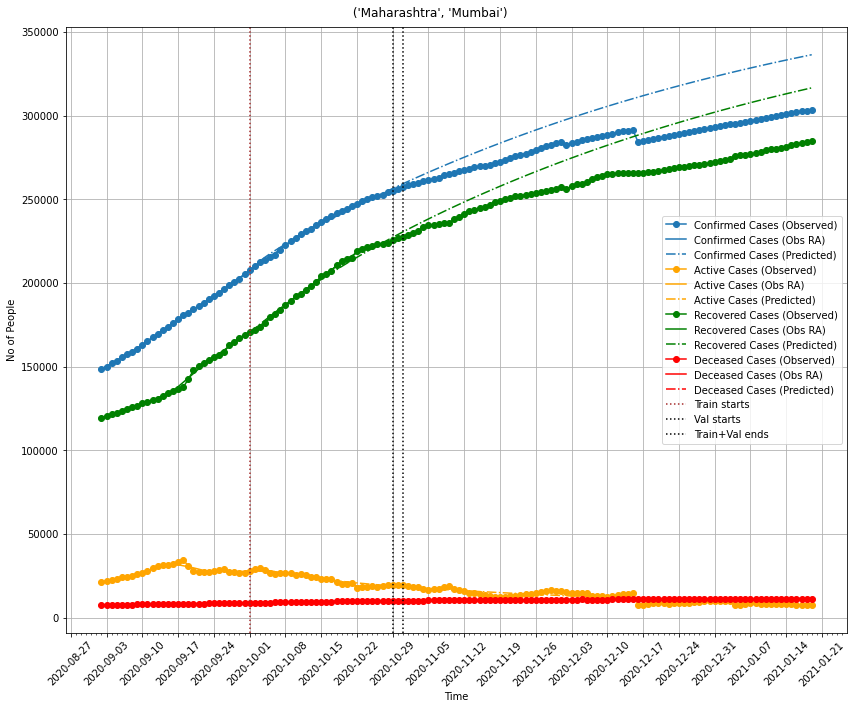

In [12]:
%%time
predictions_dict['m1'] = single_fitting_cycle(**copy.deepcopy(config['fitting']))

/Users/avtansht/anaconda3/envs/C19M/lib/python3.8/site-packages/pandas/core/indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
  0%|          | 0/5000 [00:00<?, ?it/s]

Performing m2 fit ..
loading from ../../misc/cache/dataframes_ts_20012021_tracker.pkl
splitting data ..
splitting data ..
train
 +-------------+---------------------+---------------------+---------------------+---------------------+---------------------+
|             | 184                 | 185                 | 186                 | 187                 | 188                 |
|-------------+---------------------+---------------------+---------------------+---------------------+---------------------|
| date        | 2020-10-27 00:00:00 | 2020-10-28 00:00:00 | 2020-10-29 00:00:00 | 2020-10-30 00:00:00 | 2020-10-31 00:00:00 |
| state       | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         | Maharashtra         |
| district    | Mumbai              | Mumbai              | Mumbai              | Mumbai              | Mumbai              |
| total       | 253202.29           | 254264.86           | 255360.0            | 256505.0            | 257497.0   

  0%|          | 10/2000 [00:00<00:20, 97.71it/s]

The acceptance ratio is -------->  0.175
The explored steps are -------->  101
The optimized steps are -------->  774
Gelman-Rubin convergence statistics (variance ratios):
{   'E_hosp_ratio': 1.0000666036334627,
    'I_hosp_ratio': 1.0040708029404772,
    'P_fatal': 1.1638044494463,
    'T_inc': 1.0955094632860867,
    'T_inf': 1.007239542559091,
    'T_recov': 1.06634286966177,
    'T_recov_fatal': 1.091839306960912,
    'gamma': 0.999754632148274,
    'lockdown_R0': 1.0087359278208257}


100%|██████████| 2000/2000 [00:23<00:00, 85.97it/s] 


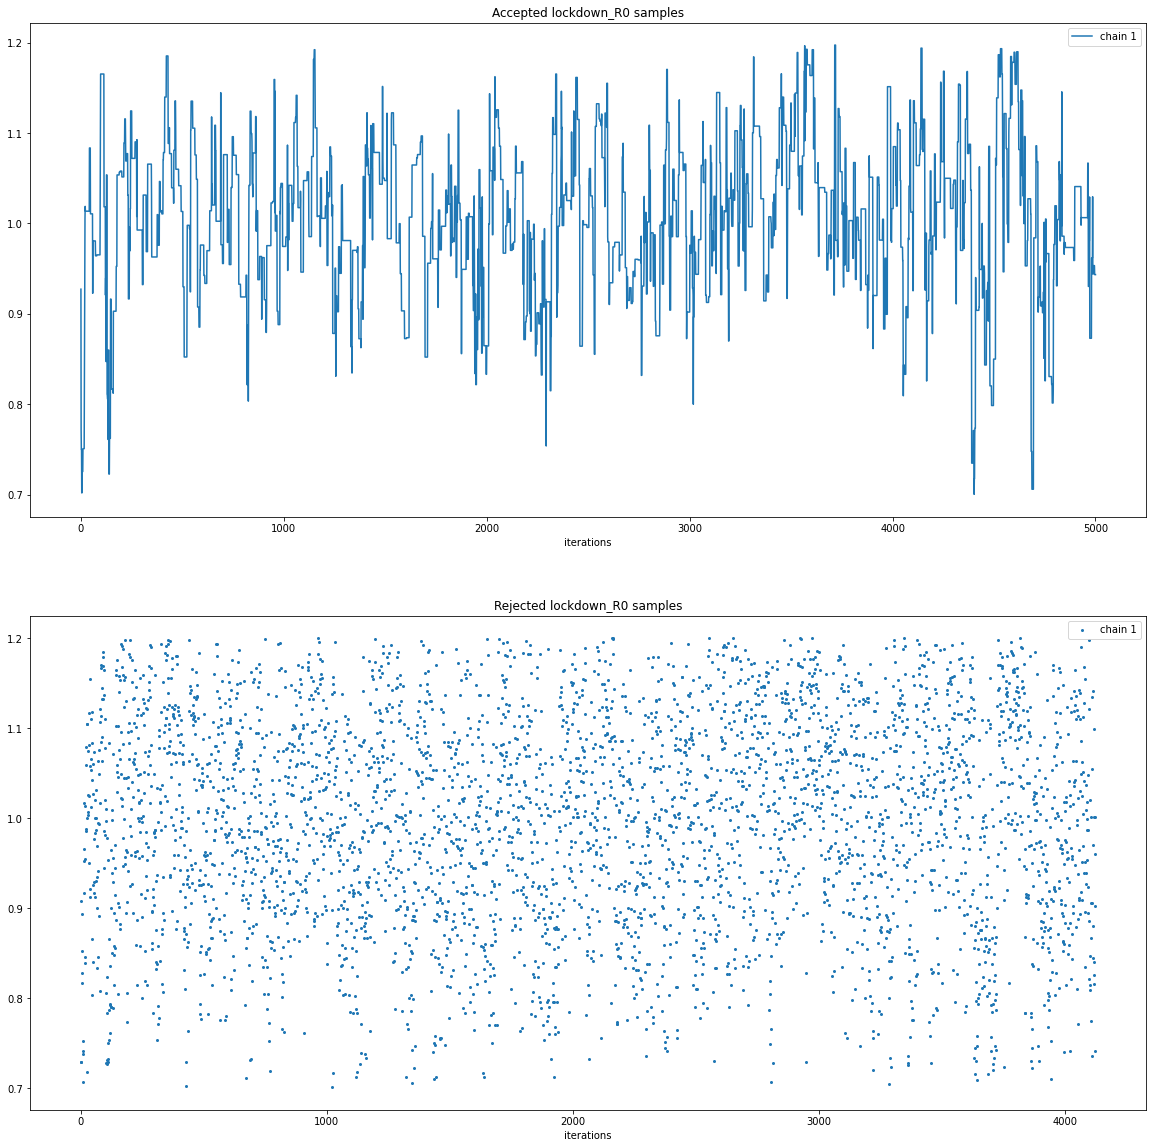

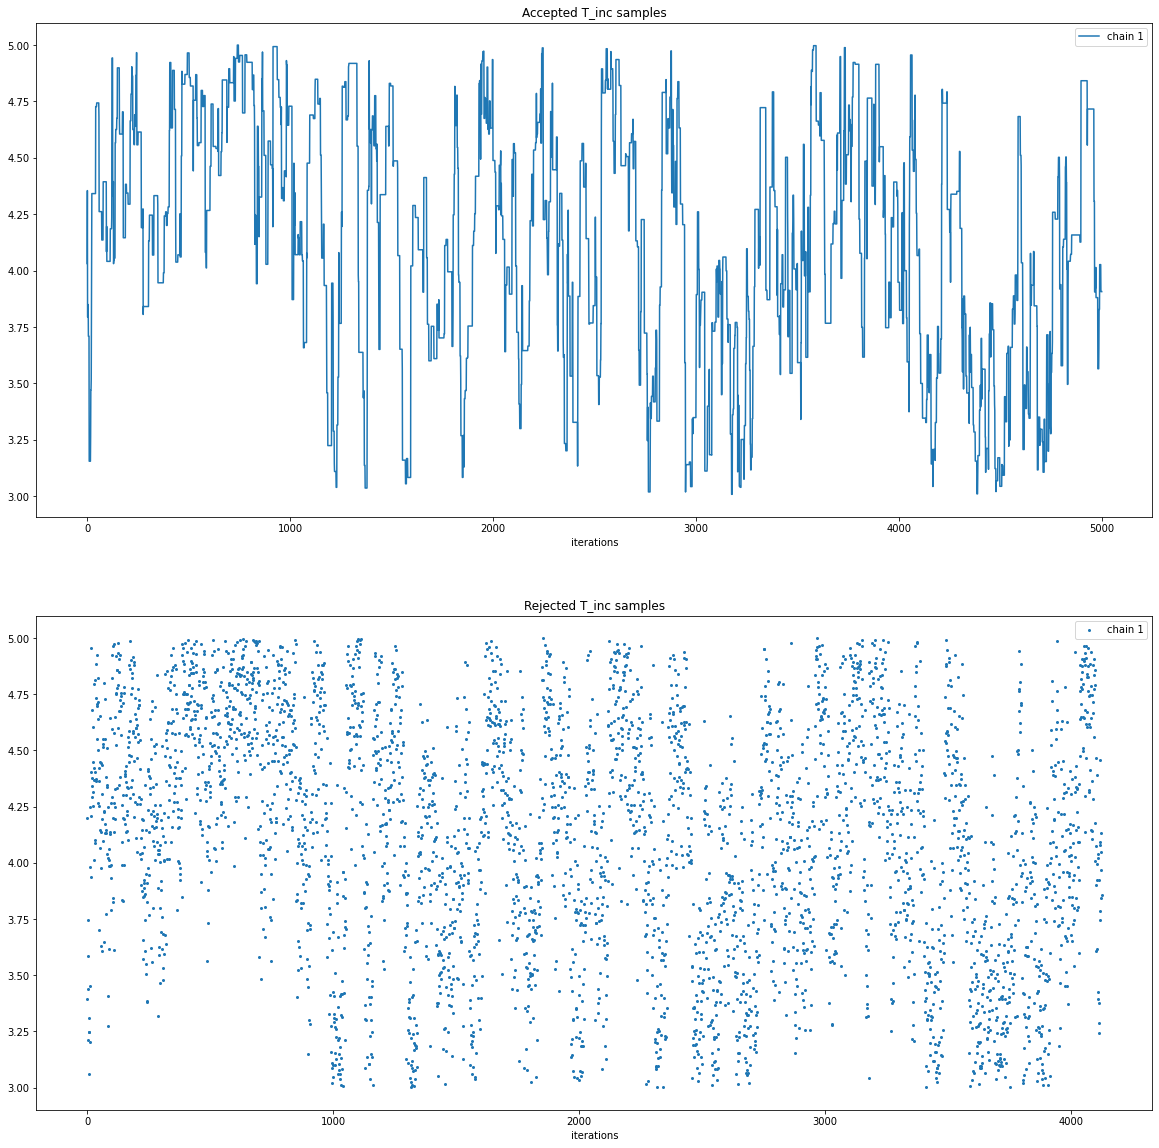

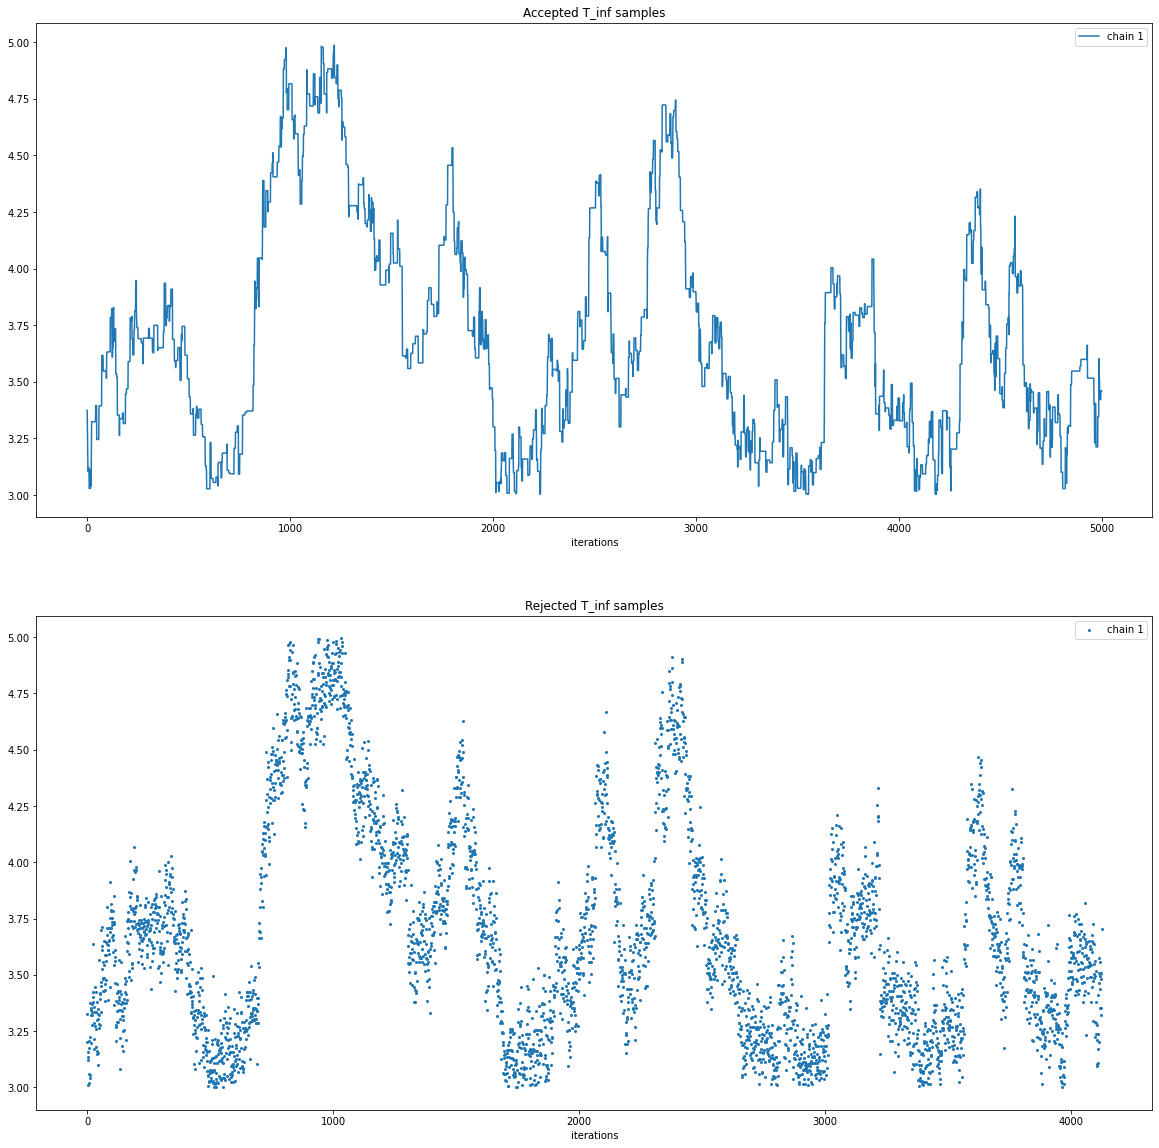

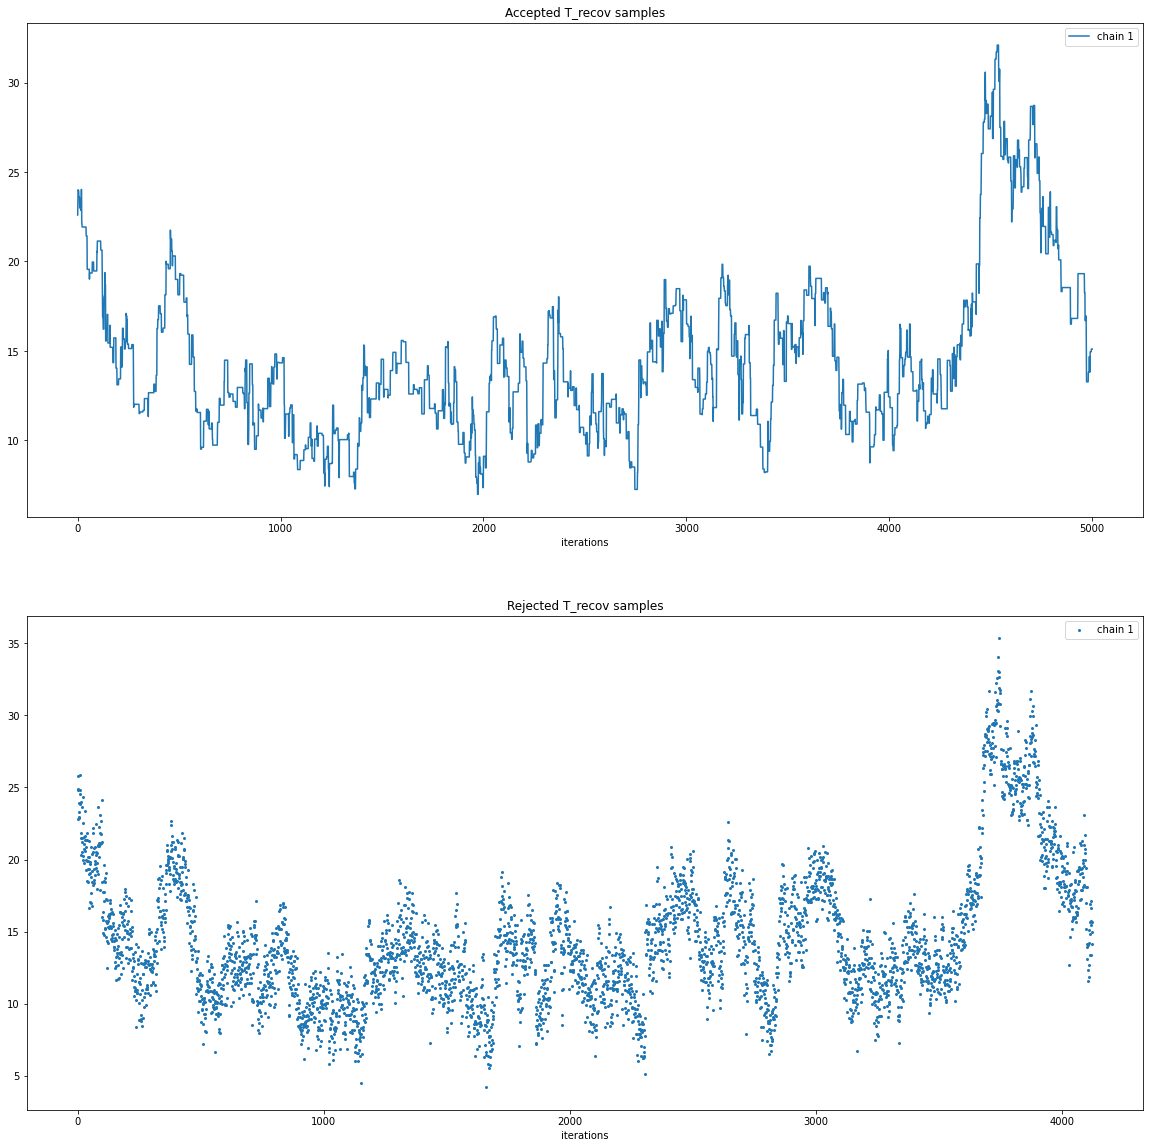

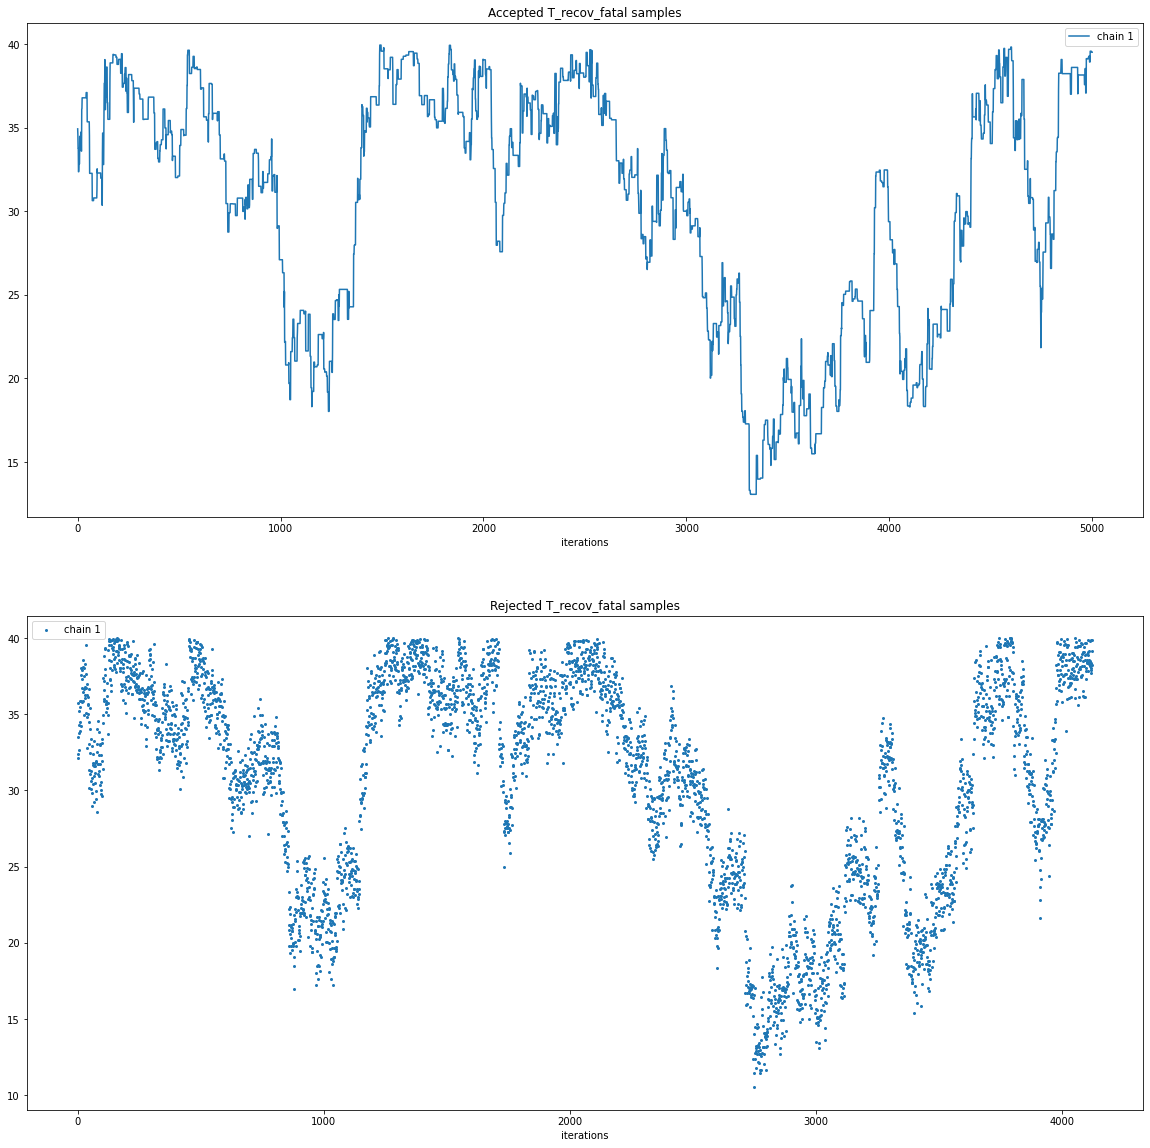

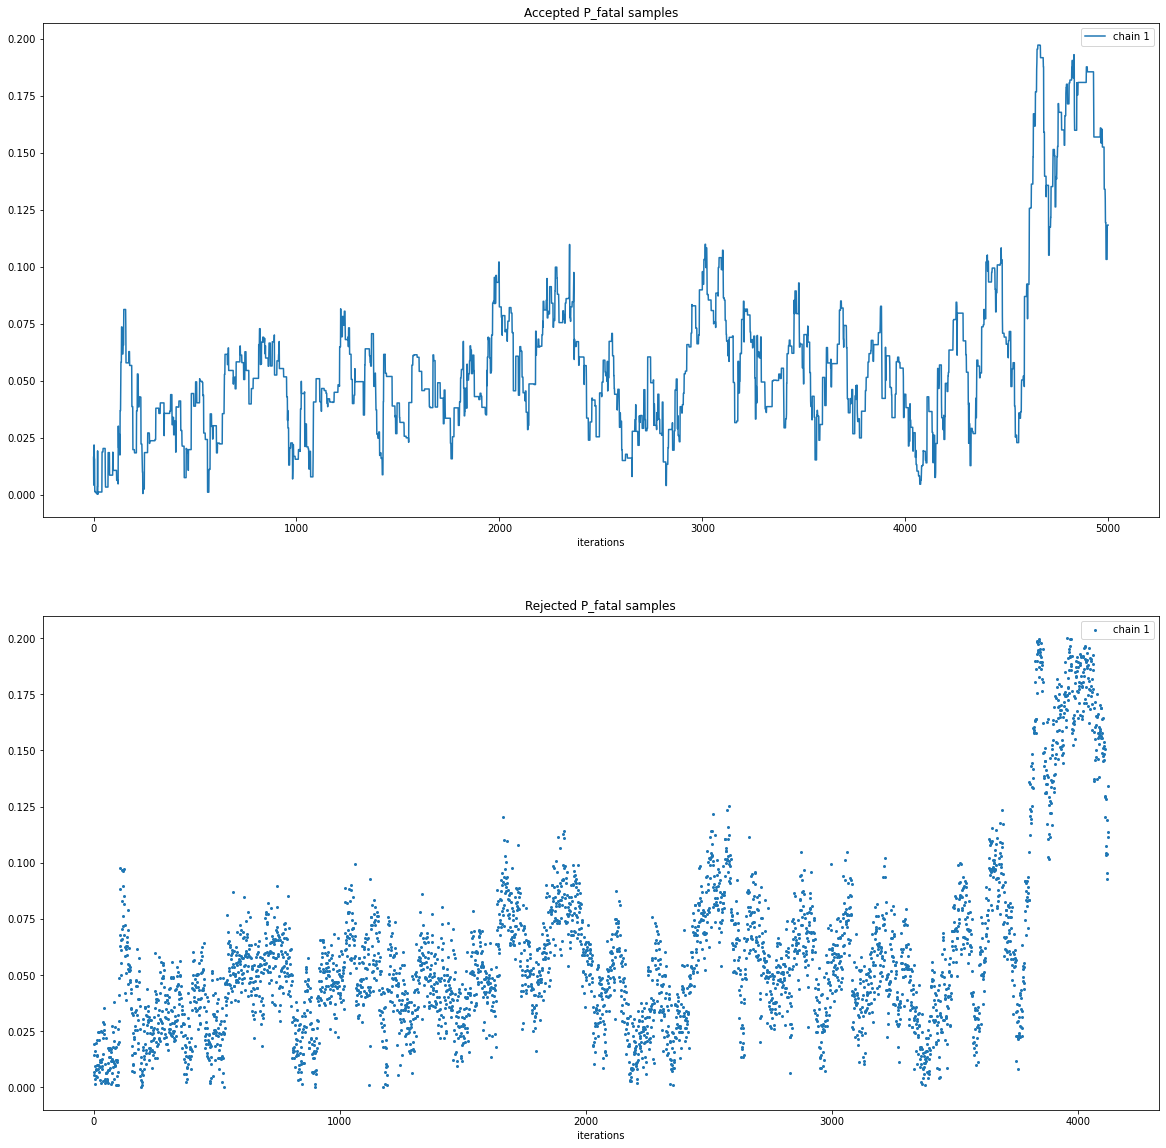

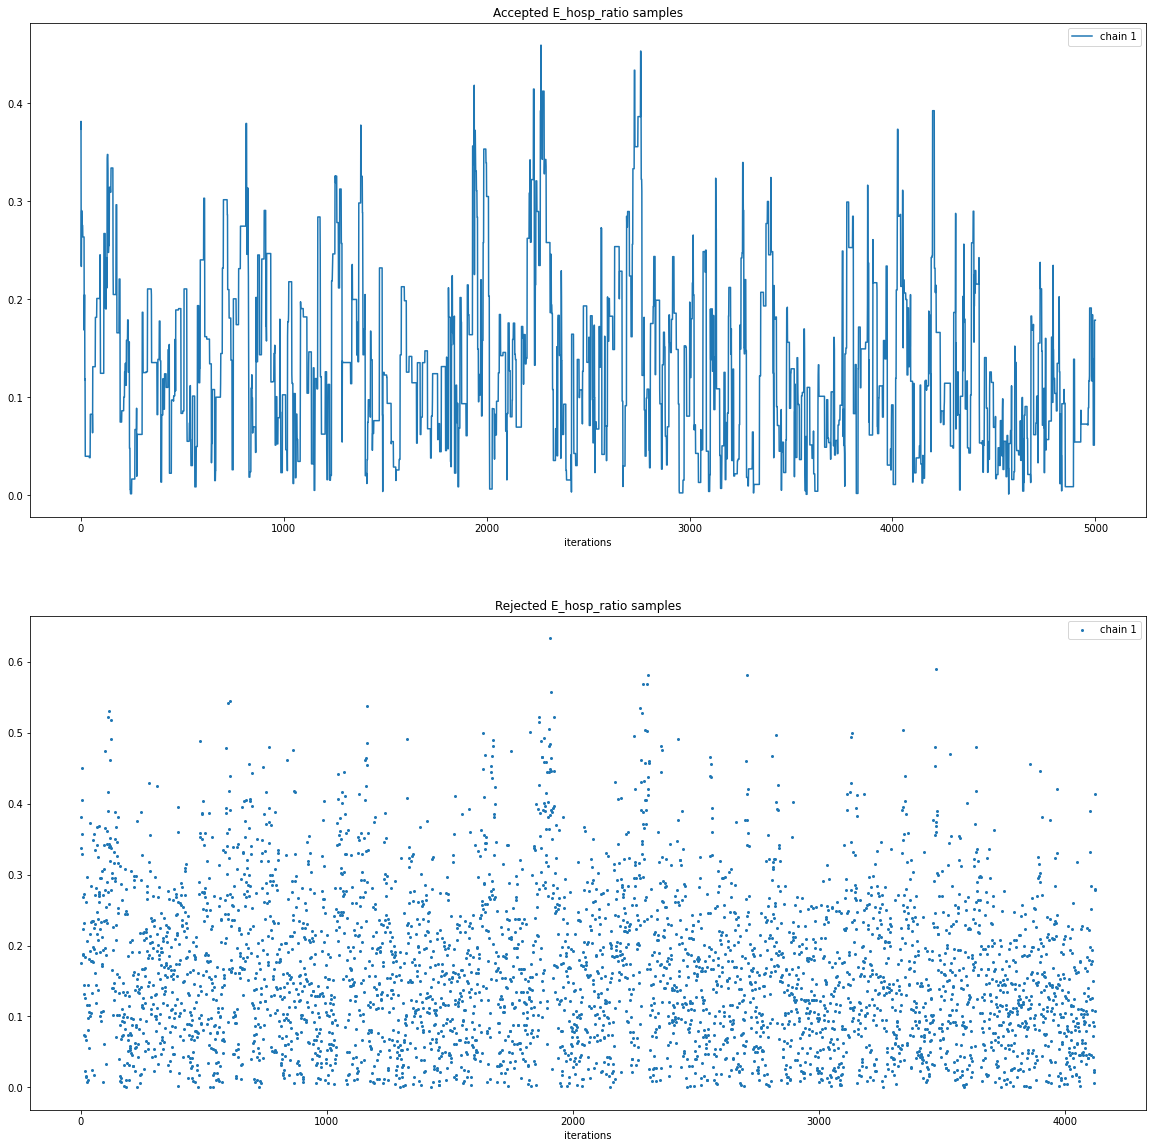

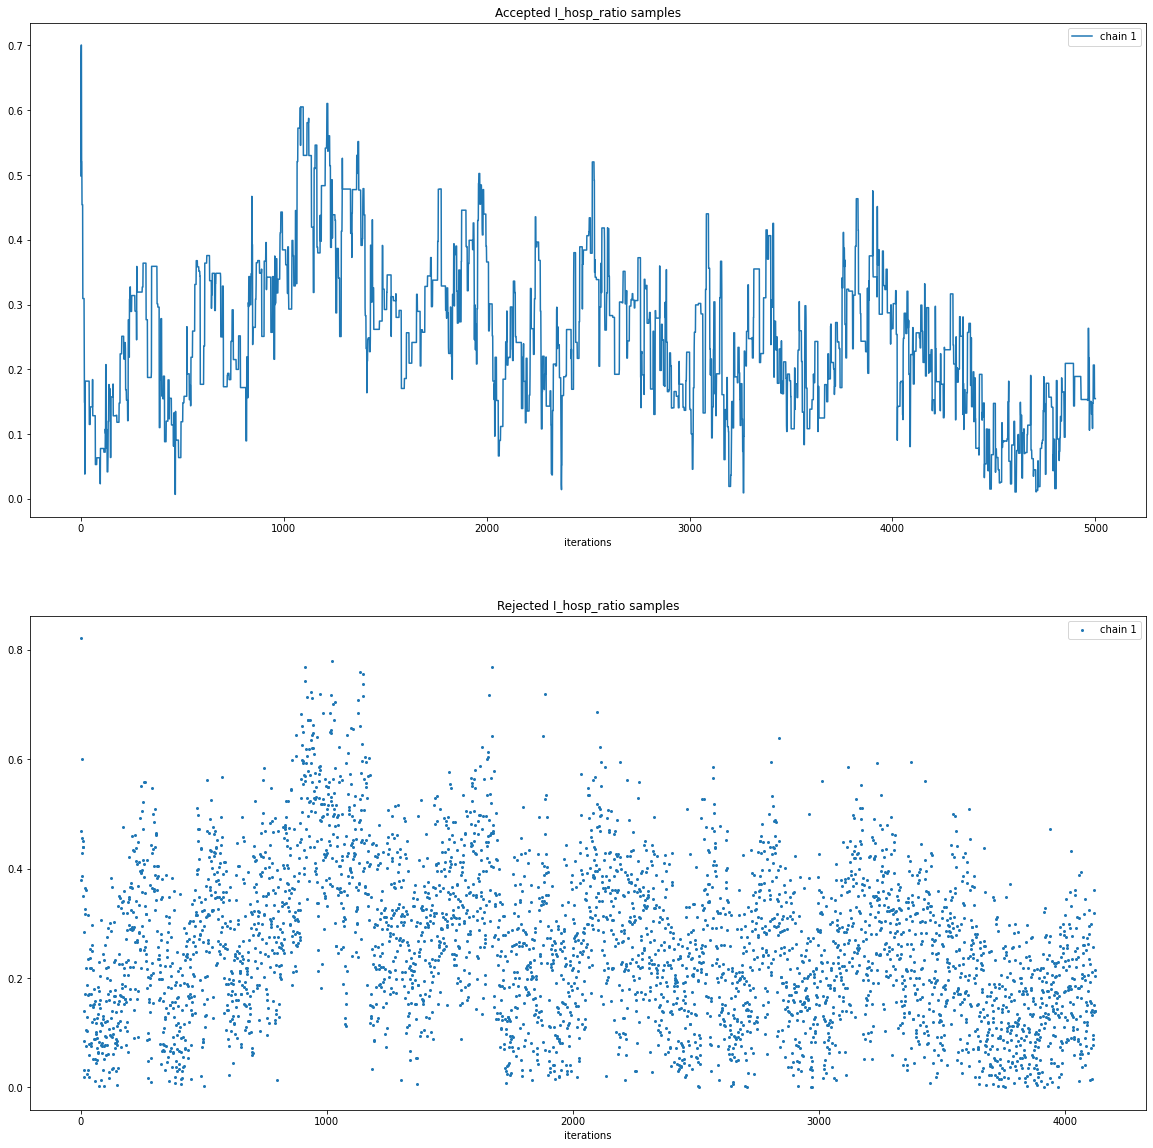

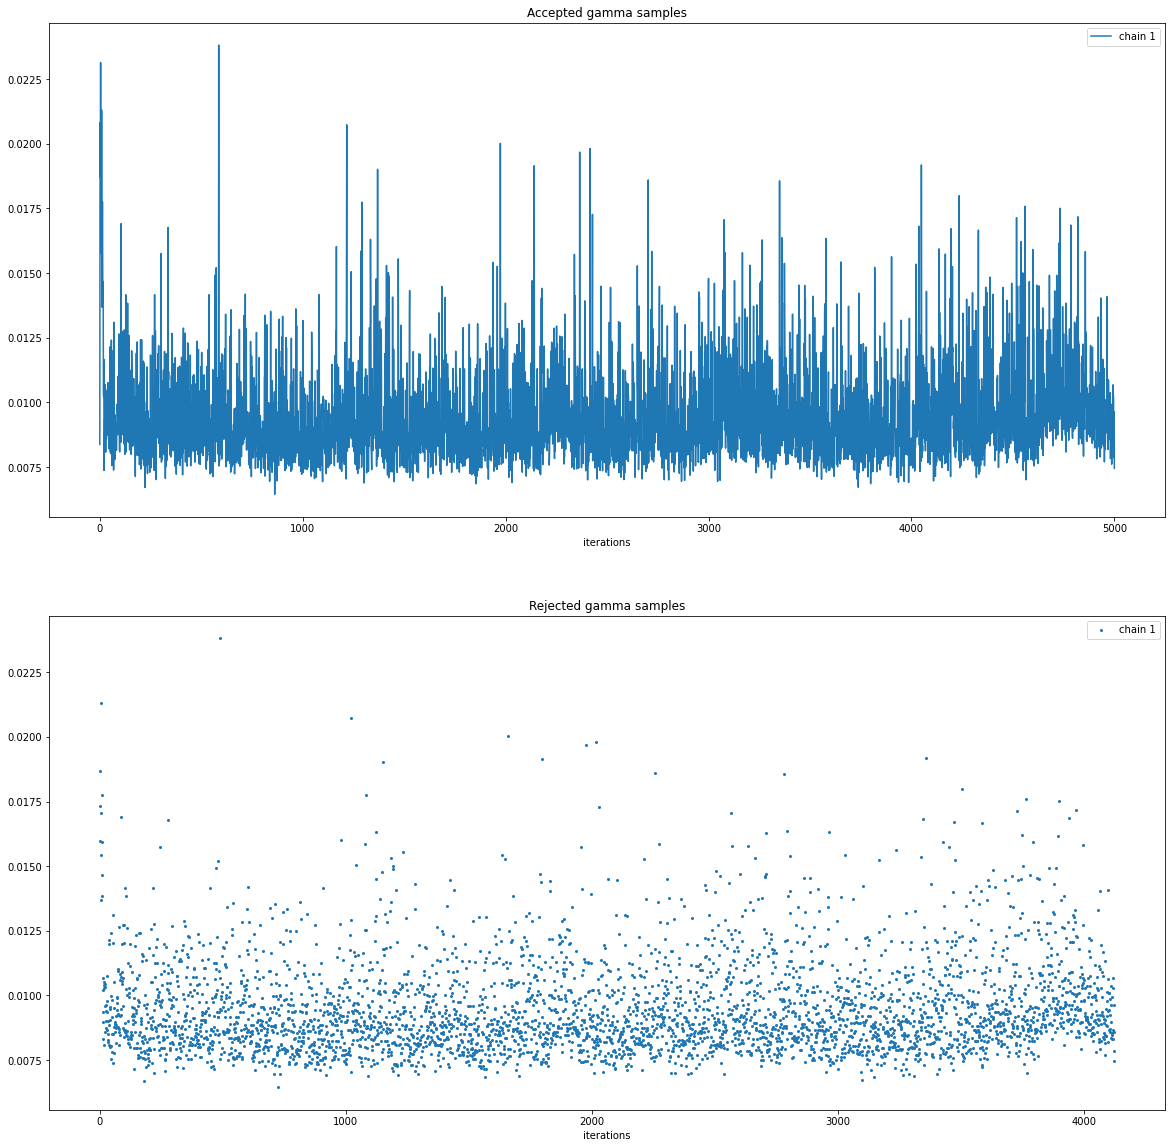

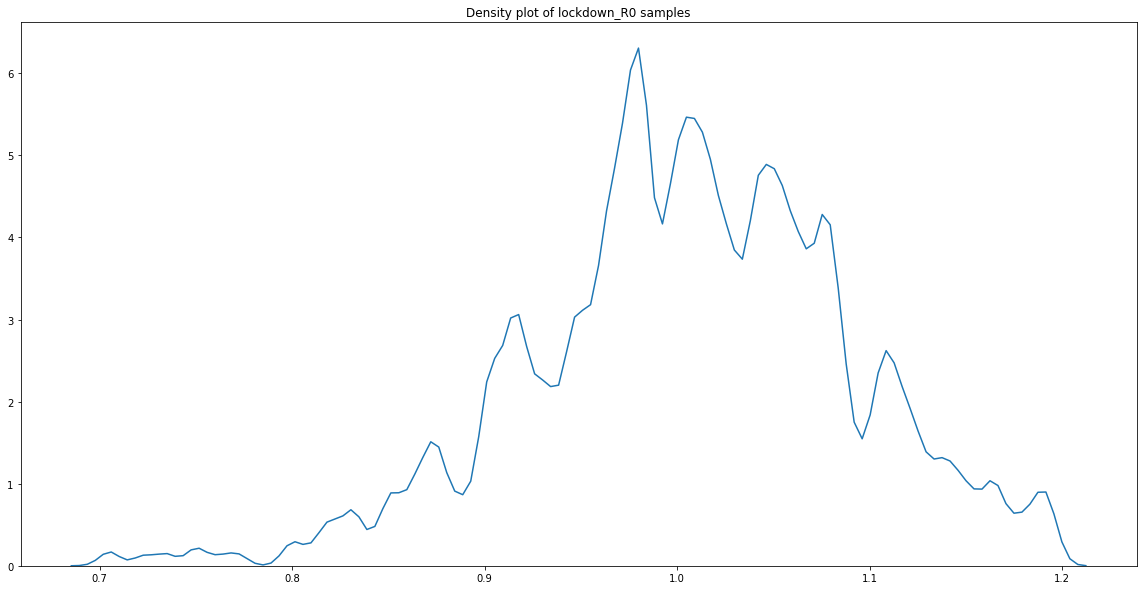

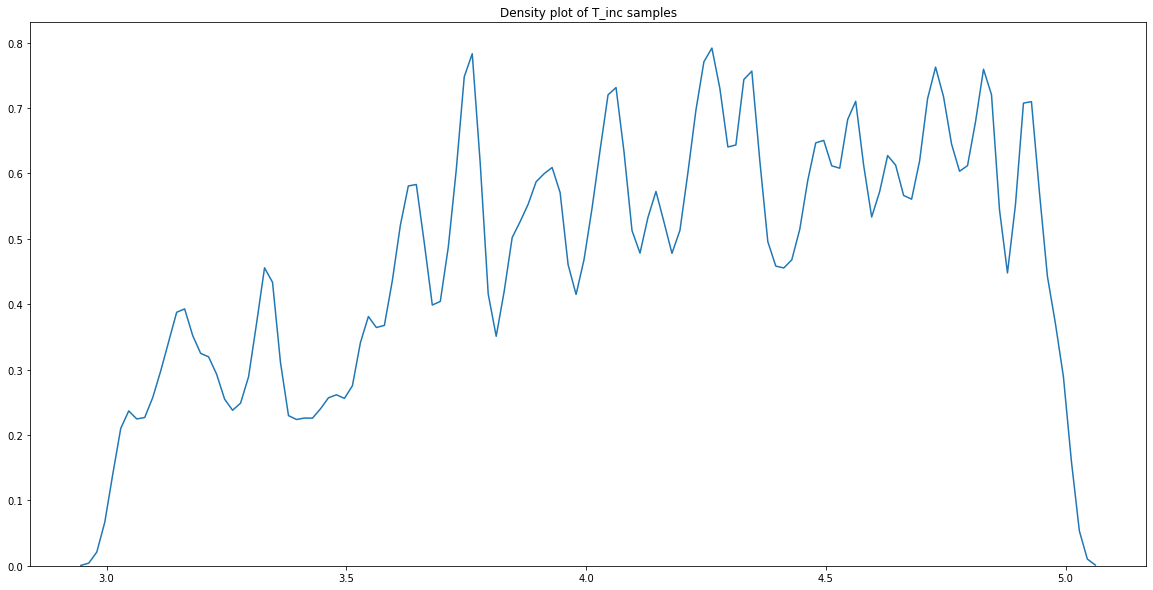

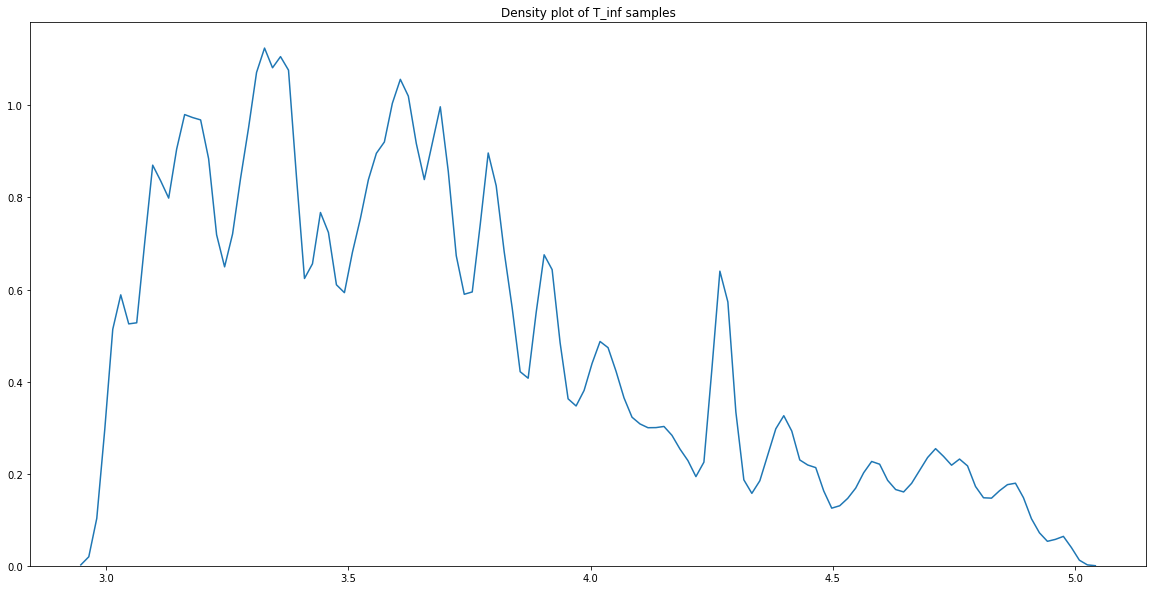

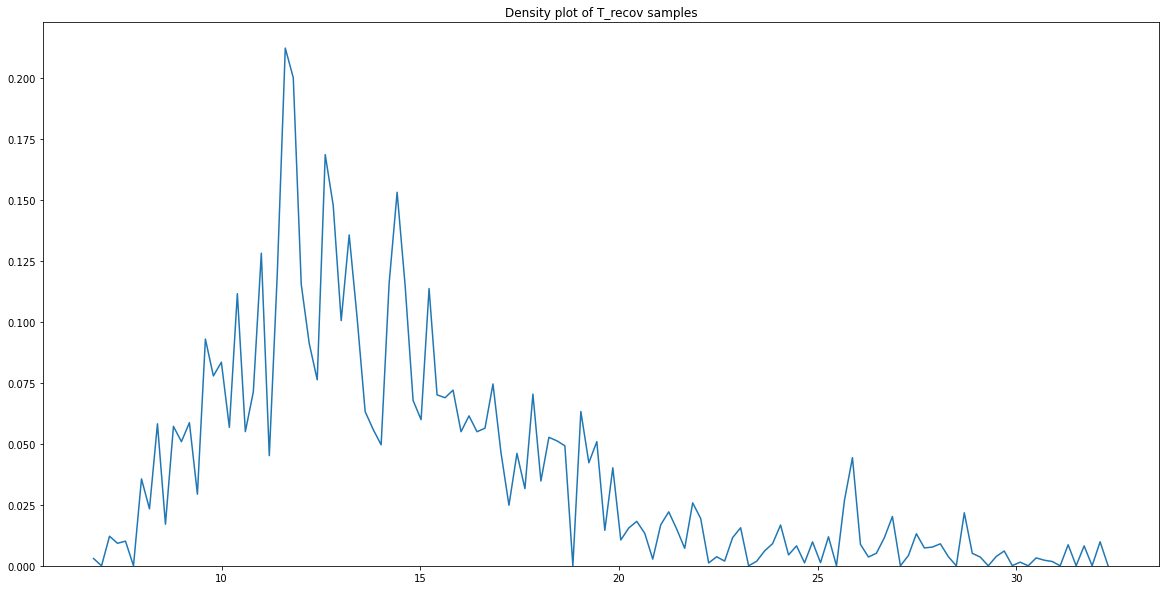

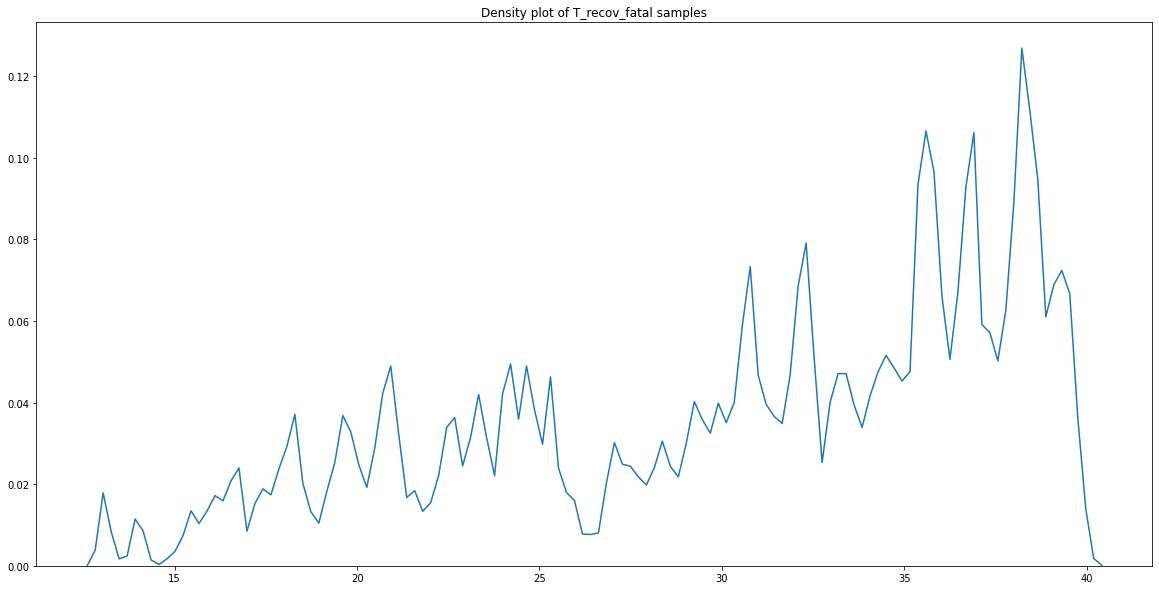

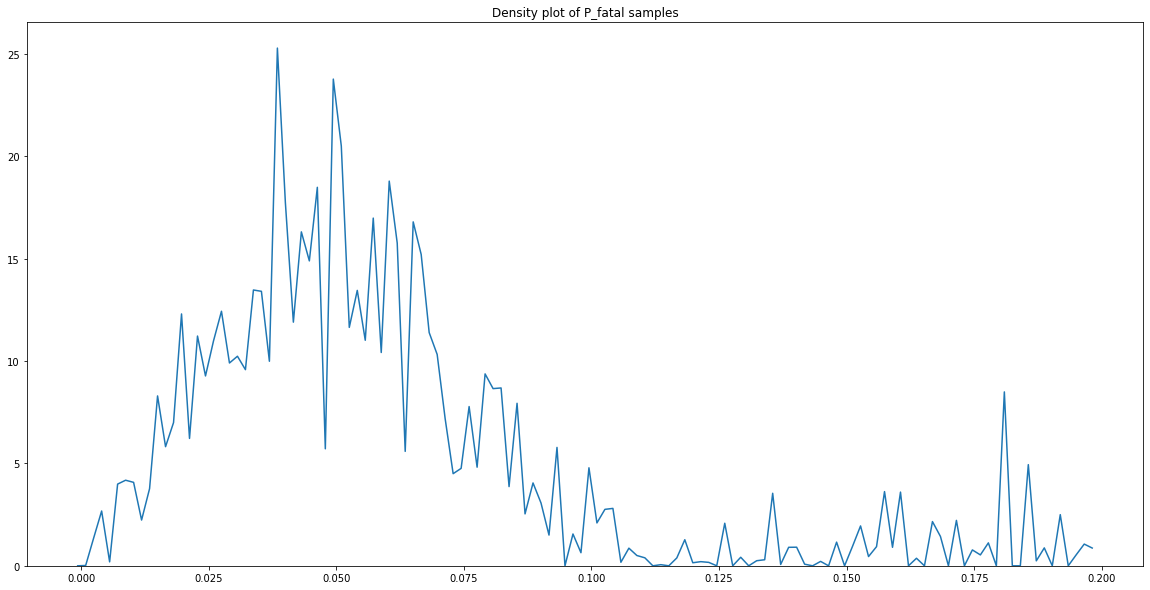

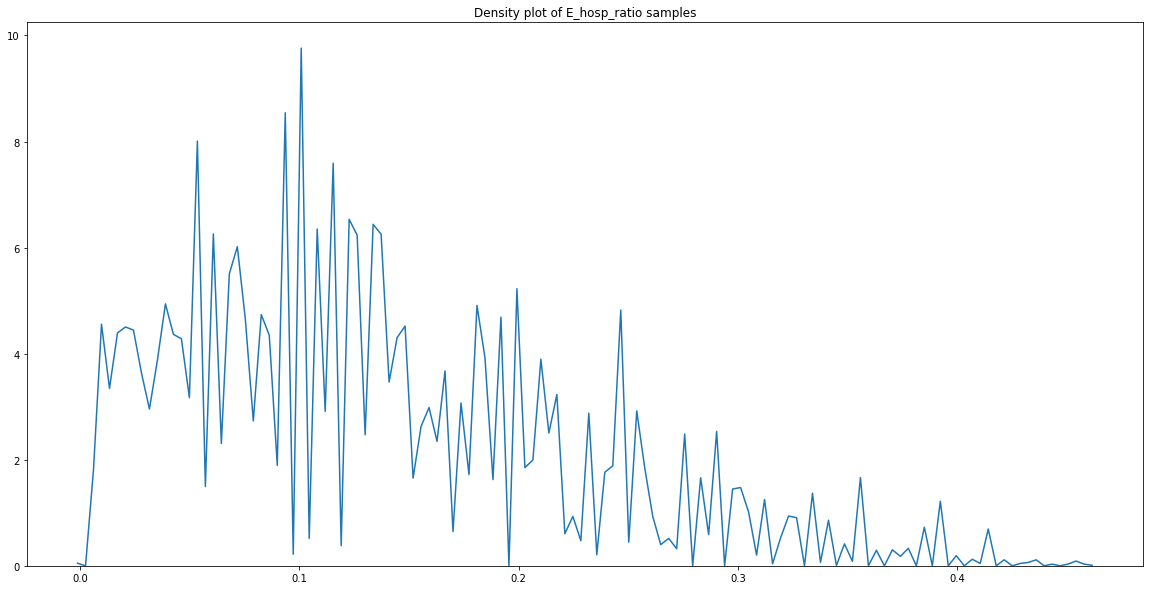

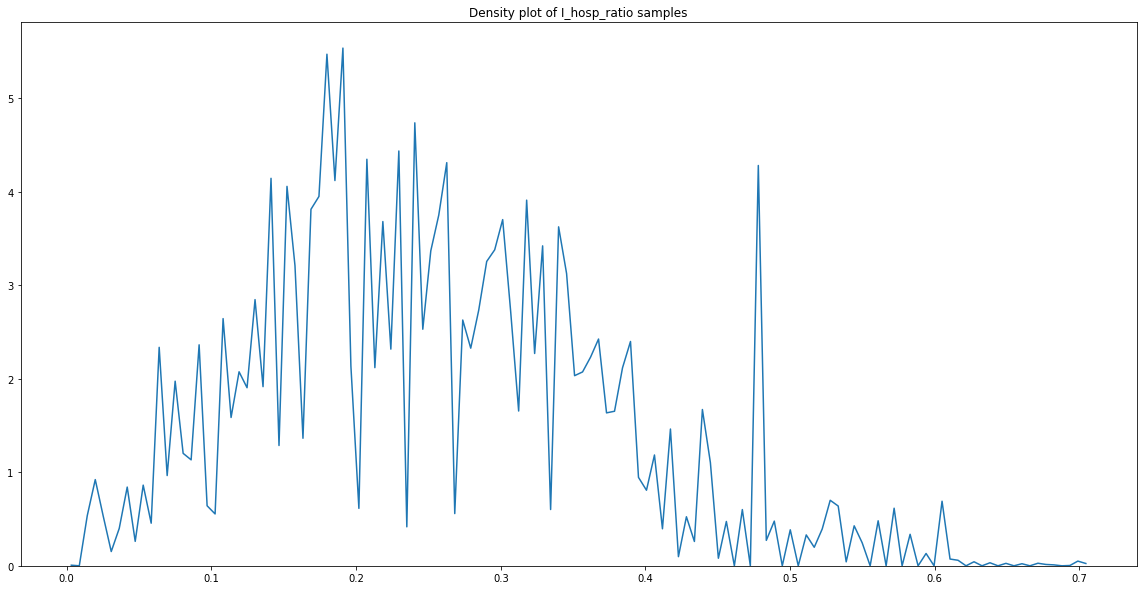

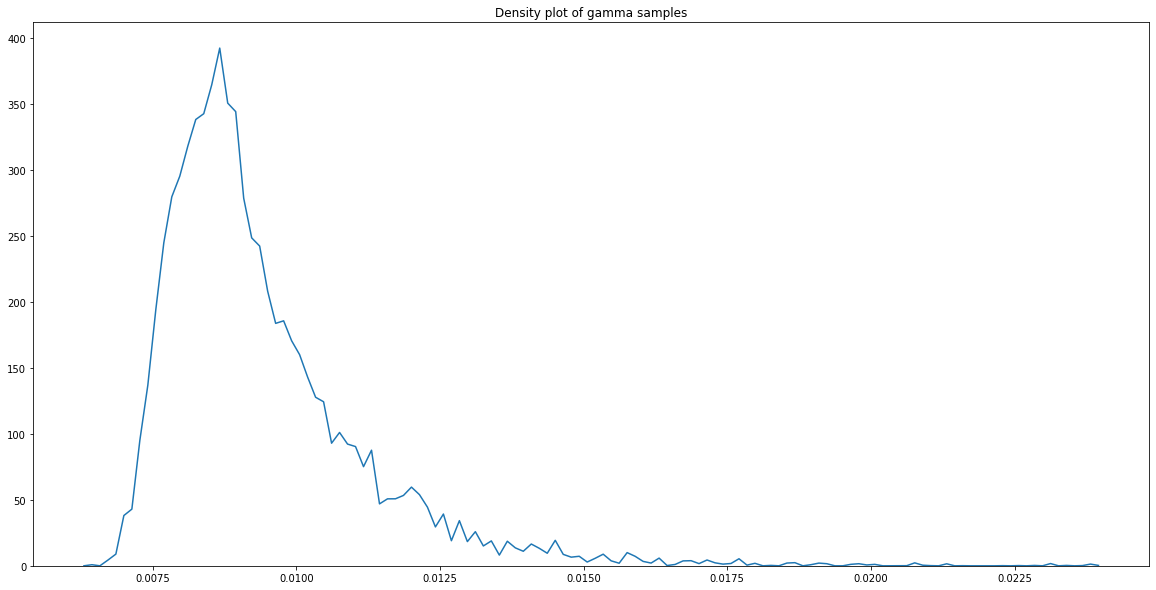

100%|██████████| 2000/2000 [00:25<00:00, 79.98it/s]


best parameters
 OrderedDict([('lockdown_R0', 1.007194622791233), ('T_inc', 4.111606647233008), ('T_inf', 3.701426734417321), ('T_recov', 10.447016919424968), ('T_recov_fatal', 35.67525706714523), ('P_fatal', 0.04176027024703334), ('E_hosp_ratio', 0.060692987647667666), ('I_hosp_ratio', 0.38938477268066923), ('gamma', 0.01227945811223492)])


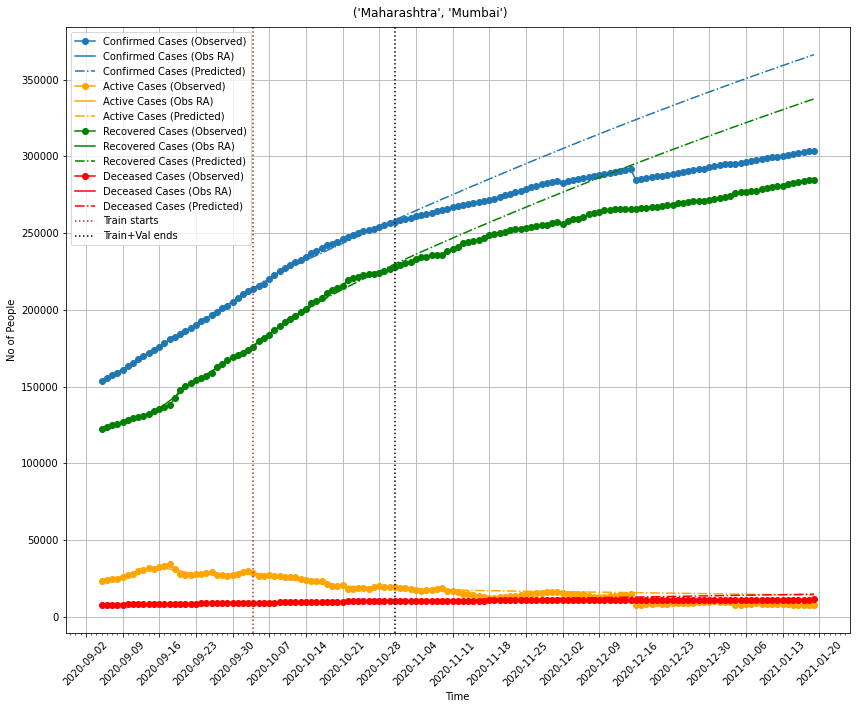

In [22]:
m2_params = copy.deepcopy(config['fitting'])
m2_params['split']['val_period'] = 0
predictions_dict['m2'] = single_fitting_cycle(**m2_params)

predictions_dict['fitting_date'] = timestamp.strftime("%Y-%m-%d")

In [ ]:
predictions_dict['m1']['best_params']

In [ ]:
predictions_dict['m2']['best_params']

## Loss Dataframes

### M1 Loss DataFrame

In [ ]:
predictions_dict['m1']['df_loss']

### M2 Loss DataFrame

In [ ]:
predictions_dict['m2']['df_loss']

## Sensitivity Plot

In [ ]:
predictions_dict['m1']['plots']['sensitivity'], _, _ = calculate_sensitivity_and_plot(predictions_dict, config, which_fit='m1')
predictions_dict['m2']['plots']['sensitivity'], _, _ = calculate_sensitivity_and_plot(predictions_dict, config, which_fit='m2')

## Plot Forecasts

In [ ]:
predictions_dict['m2']['forecasts'] = {}
predictions_dict['m2']['forecasts']['best'] = get_forecast(predictions_dict, train_fit='m2', 
                                                           model=config['fitting']['model'], 
                                                           forecast_days=config['forecast']['forecast_days'])

predictions_dict['m2']['plots']['forecast_best'] = plot_forecast(predictions_dict, 
                                                                 'test', 
                                                                 error_bars=False)

predictions_dict['m1']['trials_processed'] = forecast_all_trials(predictions_dict, train_fit='m1', 
                                                                 model=config['fitting']['model'], 
                                                                 forecast_days=config['forecast']['forecast_days'])

predictions_dict['m2']['trials_processed'] = forecast_all_trials(predictions_dict, train_fit='m2', 
                                                                 model=config['fitting']['model'], 
                                                                 forecast_days=config['forecast']['forecast_days'])

kforecasts = plot_top_k_trials(predictions_dict, train_fit='m2',
                               k=config['forecast']['num_trials_to_plot'],
                               which_compartments=config['forecast']['plot_topk_trials_for_columns'])
                               
predictions_dict['m2']['plots']['forecasts_topk'] = {}
for column in config['forecast']['plot_topk_trials_for_columns']:
    predictions_dict['m2']['plots']['forecasts_topk'][column.name] = kforecasts[column]

## Uncertainty + Uncertainty Forecasts

In [ ]:
config = read_config(config_filename)

In [ ]:
uncertainty_args = {'predictions_dict': predictions_dict, 'fitting_config': config['fitting'],
                    'forecast_config': config['forecast'], **config['uncertainty']['uncertainty_params']}
                    
uncertainty = config['uncertainty']['method'](**uncertainty_args)

In [ ]:
uncertainty.ensemble_mean_forecast['df_loss']

In [ ]:
uncertainty_forecasts = uncertainty.get_forecasts()
for key in uncertainty_forecasts.keys():
    predictions_dict['m2']['forecasts'][key] = uncertainty_forecasts[key]['df_prediction']
    
predictions_dict['m2']['forecasts']['ensemble_mean'] = uncertainty.ensemble_mean_forecast

In [ ]:
predictions_dict['m2']['beta'] = uncertainty.beta
predictions_dict['m2']['beta_loss'] = uncertainty.beta_loss
predictions_dict['m2']['deciles'] = uncertainty_forecasts

In [ ]:
predictions_dict['m2']['plots']['forecast_best_50'] = plot_forecast(predictions_dict, 
                                                                    (config['fitting']['data']['dataloading_params']['state'], 
                                                                     config['fitting']['data']['dataloading_params']['district']),
                                                                    fits_to_plot=['best', 48.7804878], error_bars=False)
predictions_dict['m2']['plots']['forecast_best_80'] = plot_forecast(predictions_dict, 
                                                                    (config['fitting']['data']['dataloading_params']['state'], 
                                                                     config['fitting']['data']['dataloading_params']['district']),
                                                                    fits_to_plot=['best', 80.48780488], error_bars=False)
predictions_dict['m2']['plots']['forecast_ensemble_mean_50'] = plot_forecast(predictions_dict, 
                                                                             (config['fitting']['data']['dataloading_params']['state'], 
                                                                              config['fitting']['data']['dataloading_params']['district']),
                                                                             fits_to_plot=['ensemble_mean', 48.7804878], error_bars=False)

In [ ]:
config['forecast']['plot_ptiles_for_columns']

In [ ]:
ptiles_plots = plot_ptiles(predictions_dict, which_compartments=config['forecast']['plot_ptiles_for_columns'])
predictions_dict['m2']['plots']['forecasts_ptiles'] = {}
for column in config['forecast']['plot_ptiles_for_columns']:
    predictions_dict['m2']['plots']['forecasts_ptiles'][column.name] = ptiles_plots[column]

## Create Report

In [ ]:
save_dict_and_create_report(predictions_dict, config, ROOT_DIR=output_folder, config_filename=config_filename)

## Create Output CSV

In [ ]:
df_output = create_decile_csv_new(predictions_dict)
df_output.to_csv(f'{output_folder}/deciles.csv')

## Log on W&B

In [ ]:
wandb.init(project="covid-modelling", config=wandb_config)

In [ ]:
log_wandb(predictions_dict)

## Create All Trials Output

In [ ]:
df_all = create_all_trials_csv(predictions_dict)
df_all.to_csv(f'{output_folder}/all_trials.csv')

## Log on MLFlow

In [ ]:
a = {1:[2,3],2:[3,4],3:[4,5]}
b = {1:[4,5],2:[5,6],3:[7,8]}

In [ ]:
a.update(b)

In [ ]:
a


In [ ]:
log_mlflow(config['logging']['experiment_name'], run_name=config['logging']['run_name'], artifact_dir=output_folder)